# Projekt ML, przygotowanie danych, część 1.

Poniższy rozdział skupia się na analizie i przygotowaniu danych w sensie statystycznym.

Uczenie maszynowe zrealizowano w pliku "Projekt ML Machine Learning"

## 1. Opis zbioru i typy danych

### Opis zbioru danych

Zbiór danych zawiera informacje o 392 samochodach produkowanych w latach 70. i 80. XX wieku. **Celem analizy jest zrozumienie od czego zależy bardziej ekonomiczne zużycie paliwa (mpg)? Czy da się przewidzieć zużycie paliwa na podstawie danych ze zbioru ?**

#### Zmienna objaśniana:
- **mpg** - liczba mil przejechanych na jednym galonie paliwa – czyli wskaźnik zużycia paliwa / efektywności spalania
#### Zmienne objaśniające (cechy):
- **cylinders** – liczba cylindrów silnika (od 4 do 8)
- **displacement** – objętość skokowa silnika (w calach sześciennych)
- **horsepower** – moc silnika (w koniach mechanicznych)
- **weight** – masa pojazdu (w funtach)
- **acceleration** – czas przyspieszenia od 0 do 60 mph (w sekundach)
- **year** – rok produkcji (dwie ostatnie cyfry, np. 70 = 1970)
- **origin** – kraj produkcji:
  - 1 – USA  
  - 2 – Europa  
  - 3 – Japonia
- **name** – nazwa samochodu (np. chevrolet chevelle malibu)

#### Rozmiar zbioru:
- **Liczba obserwacji**: 392
- **Liczba zmiennych**: 9 (w tym jedna tekstowa: name)

In [32]:
# importowanie bibliotek

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [33]:
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'

In [34]:
# wczytanie danych

df = pd.read_csv('cars.csv')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [35]:
# rozmiar danych

print(f"Liczba wierszy: {df.shape[0]}")
print(f"Liczba kolumn: {df.shape[1]}")

Liczba wierszy: 392
Liczba kolumn: 9


In [36]:
# tabela z typami, unikalnymi wartościami i brakami

summary = pd.DataFrame({
    'Typ danych': df.dtypes,
    'Liczba unikalnych': df.nunique(),
    'Liczba braków': df.isna().sum()
})

summary

,Typ danych,Liczba unikalnych,Liczba braków
mpg,float64,127,0
cylinders,int64,5,0
displacement,float64,81,0
horsepower,int64,93,0
weight,int64,346,0
acceleration,float64,95,0
year,int64,13,0
origin,int64,3,0
name,object,301,0


In [37]:
# ststystyki cech liczbowych

df.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,392.0,23.445918,7.805007,9.0,17.000,22.75,29.000,46.6
cylinders,392.0,5.471939,1.705783,3.0,4.000,4.00,8.000,8.0
displacement,392.0,194.411990,104.644004,68.0,105.000,151.00,275.750,455.0
horsepower,392.0,104.469388,38.491160,46.0,75.000,93.50,126.000,230.0
weight,392.0,2977.584184,849.402560,1613.0,2225.250,2803.50,3614.750,5140.0
acceleration,392.0,15.541327,2.758864,8.0,13.775,15.50,17.025,24.8
year,392.0,75.979592,3.683737,70.0,73.000,76.00,79.000,82.0
origin,392.0,1.576531,0.805518,1.0,1.000,1.00,2.000,3.0


In [38]:
# kolumny w zbiorze danych

print("Kolumny w zbiorze danych:")
print(df.columns.tolist())

Kolumny w zbiorze danych:
['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin', 'name']


In [39]:
# liczba unikalnych wartości dla każdej kolumny

print("Liczba unikalnych wartości w każdej kolumnie:")
print(df.nunique())

Liczba unikalnych wartości w każdej kolumnie:
mpg             127
cylinders         5
displacement     81
horsepower       93
weight          346
acceleration     95
year             13
origin            3
name            301
dtype: int64


In [40]:
# Unikalne wartości dla kolumny cylinders

print("Unikalne wartości w kolumnie 'cylinders':")
print(df['cylinders'].value_counts().sort_index())

Unikalne wartości w kolumnie 'cylinders':
cylinders
3      4
4    199
5      3
6     83
8    103
Name: count, dtype: int64


In [41]:
# filtrowanie aut z 3 lub 5 cylindrami
df_cyl_3_5 = df[df['cylinders'].isin([3, 5])]

# podgląd wyników
df_cyl_3_5

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
70,19.0,3,70.0,97,2330,13.5,72,3,mazda rx2 coupe
110,18.0,3,70.0,90,2124,13.5,73,3,maxda rx3
241,21.5,3,80.0,110,2720,13.5,77,3,mazda rx-4
272,20.3,5,131.0,103,2830,15.9,78,2,audi 5000
295,25.4,5,183.0,77,3530,20.1,79,2,mercedes benz 300d
325,36.4,5,121.0,67,2950,19.9,80,2,audi 5000s (diesel)
331,23.7,3,70.0,100,2420,12.5,80,3,mazda rx-7 gs


Samochody z 3 cylindrami posiadaja nietypowe parametry, objętość skokowa (displacement) jest nienaturalnie niska, natomiast moc jak na tak niska pojemność jest za wykoka. **Samochody z 3 cylindrami zostana usuniete ze zbioru danych.**

In [42]:
# dane bez wartości cylinders==3
# usunięcie aut z 3 cylindrami

df_out_3 = df[df['cylinders'] != 3]

# reset indeksów po usunięciu (aktualizacja indeksów)
df_out_3.reset_index(drop=True, inplace=True)
# df_raw = df_out_3

print("Nowy rozmiar zbioru:", df_out_3.shape)

Nowy rozmiar zbioru: (388, 9)


In [43]:
# Zapisanie wstępnie przetworzonych danych do pliku
# df_raw.to_csv('data/cars_preprocessed.csv', index=False)

df_out_3.to_csv('cars_preprocessed.csv', index=False) # bez indeksów Pandas (czyli bez kolumny z numerem wiersza)

## 2. Analiza rozkładów zmiennych liczbowych.

Wybieramy kolumny numeryczne (bez year, origin, name)

- year zawiera tylko kilkanaście wartości całkowitych i reprezentuje rok produkcji, co czyni ją zmienną dyskretną
- origin to zmienna kategoryczna (1 = USA, 2 = Europa, 3 = Japonia)
- name to zmienna tekstowa (opisowa) z wieloma unikalnymi wartościami — nie nadaje się do analizy rozkładu.

W analizie rozkładów skupiamy się wyłącznie na typowo liczbowych cechach ciągłych, takich jak: mpg, displacement, horsepower, weight, acceleration.


### Histogramy z liniami średniej, mediany, odchylenia standardowego

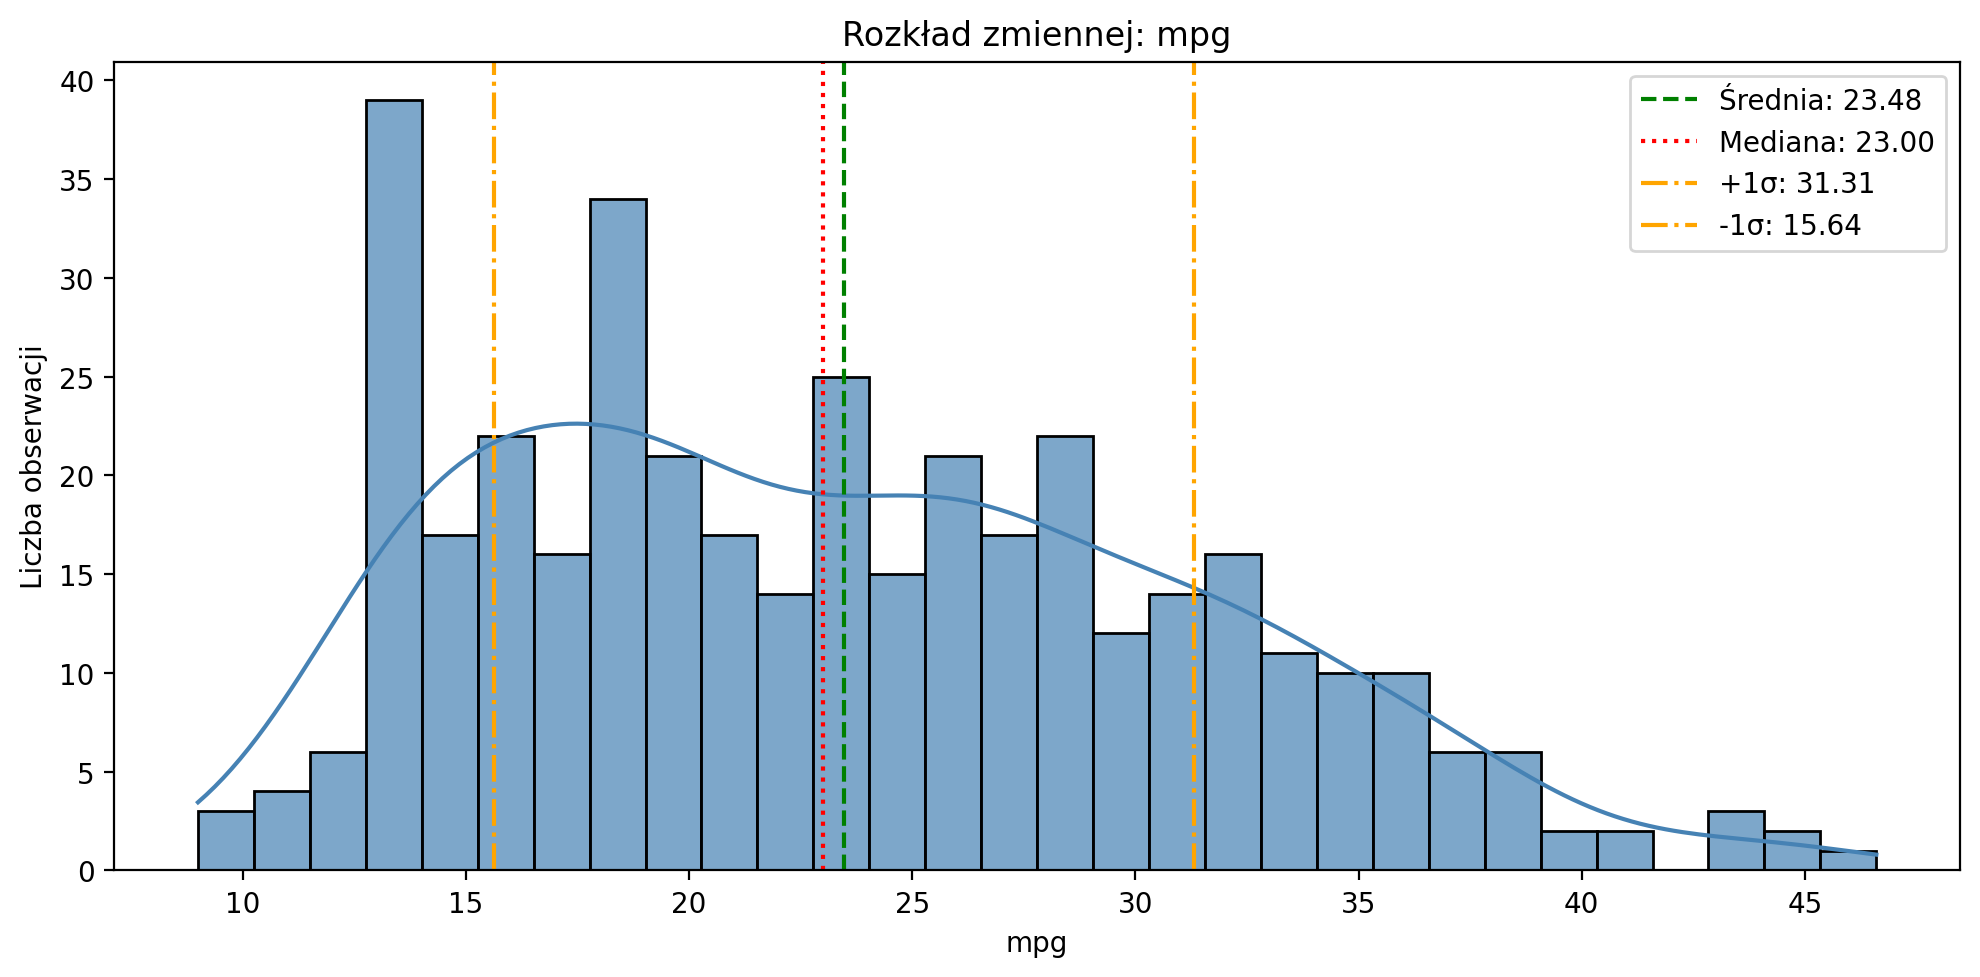

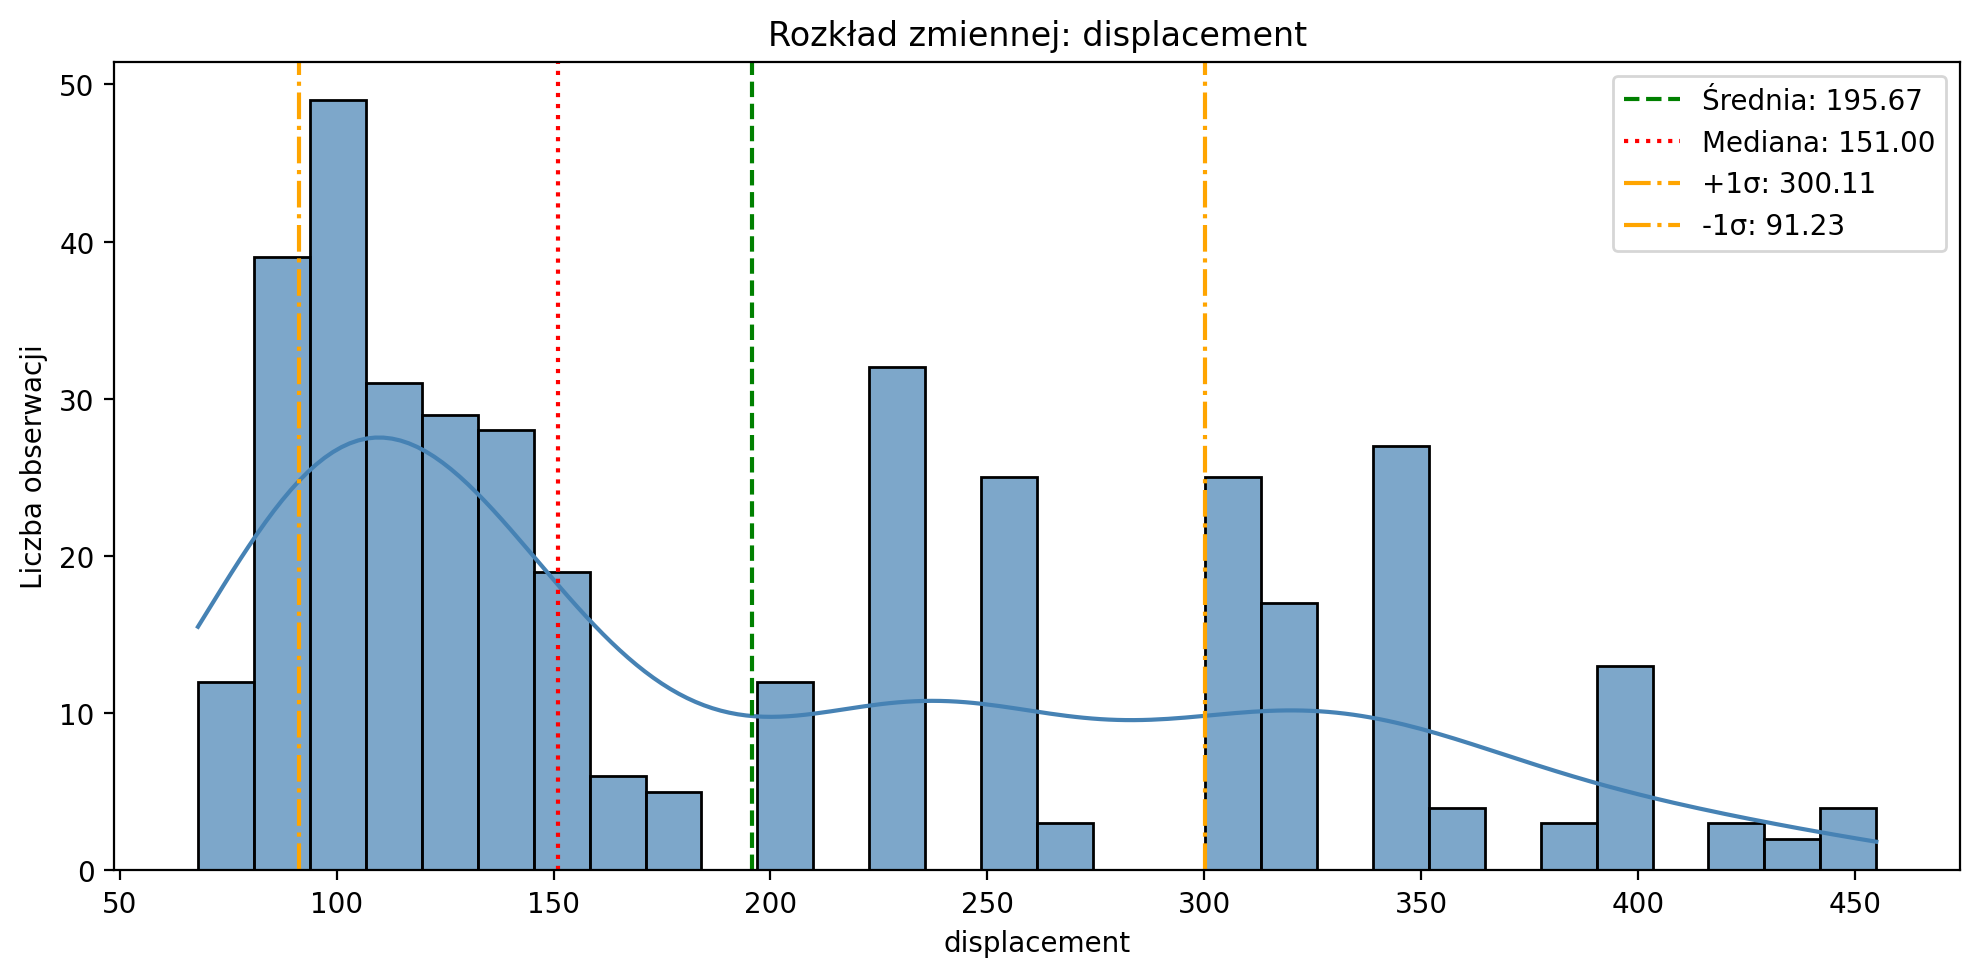

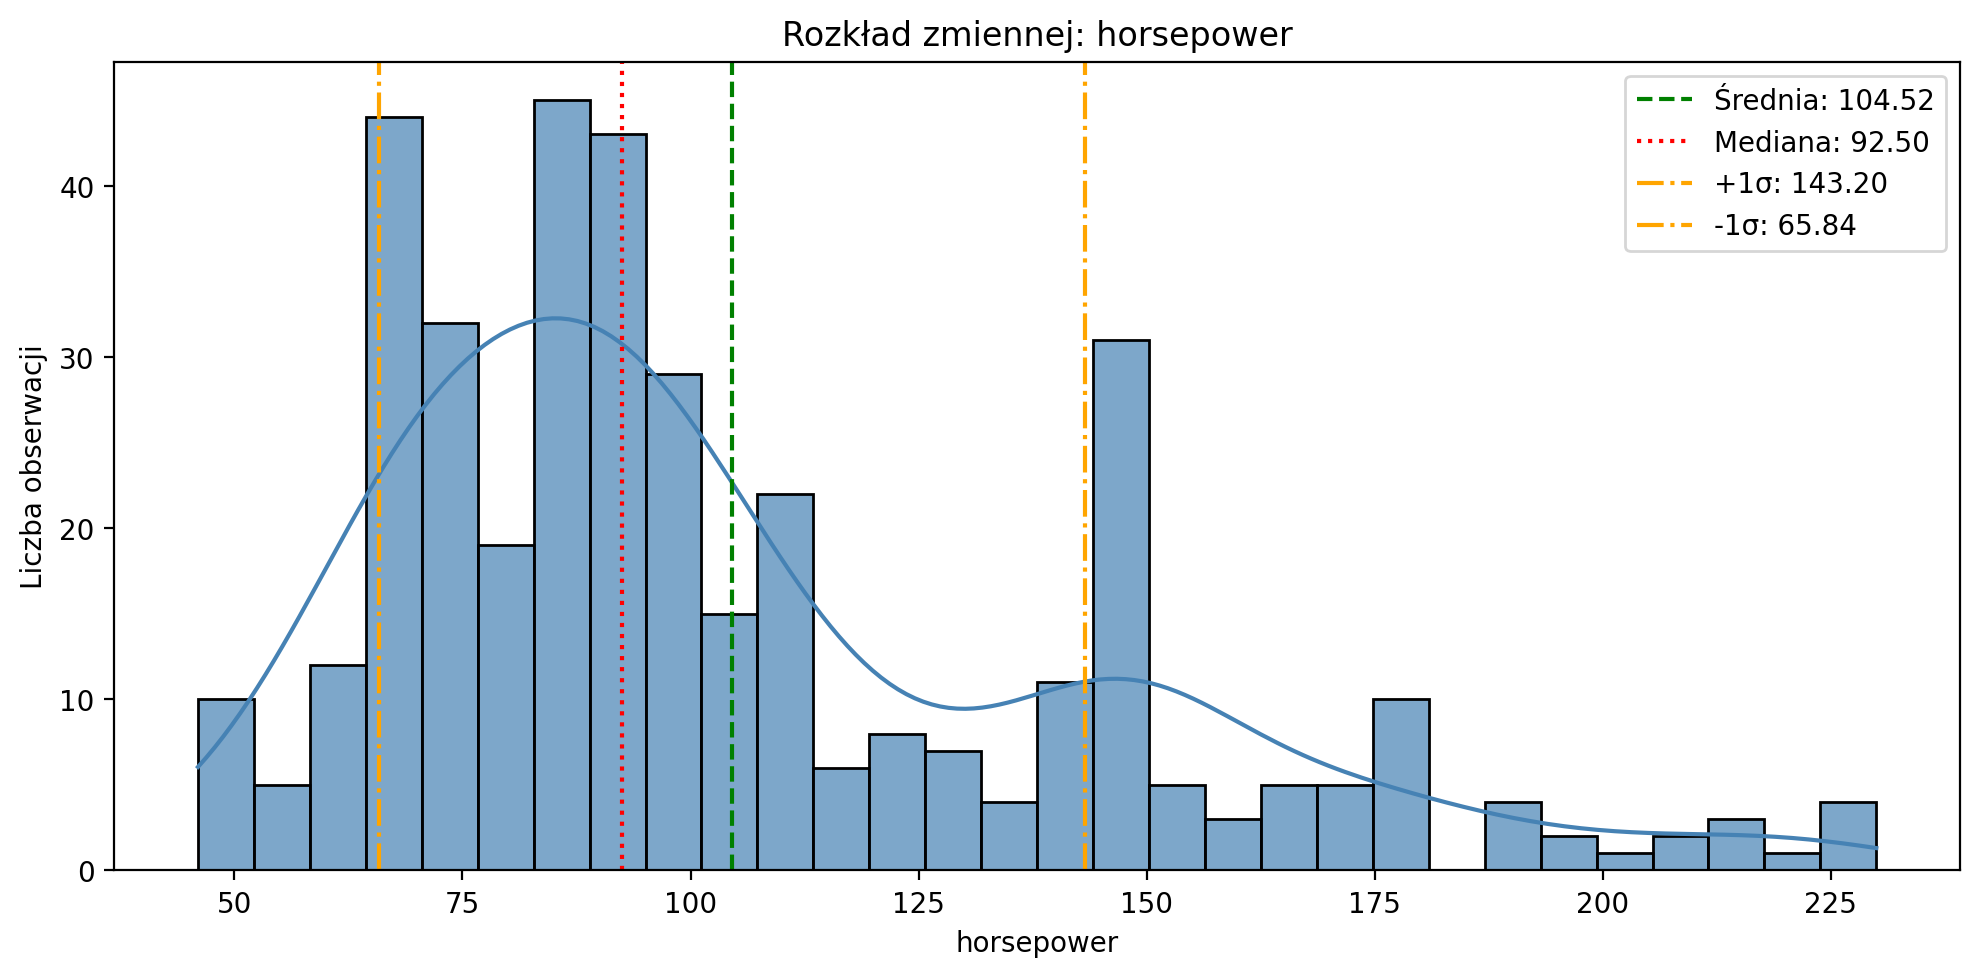

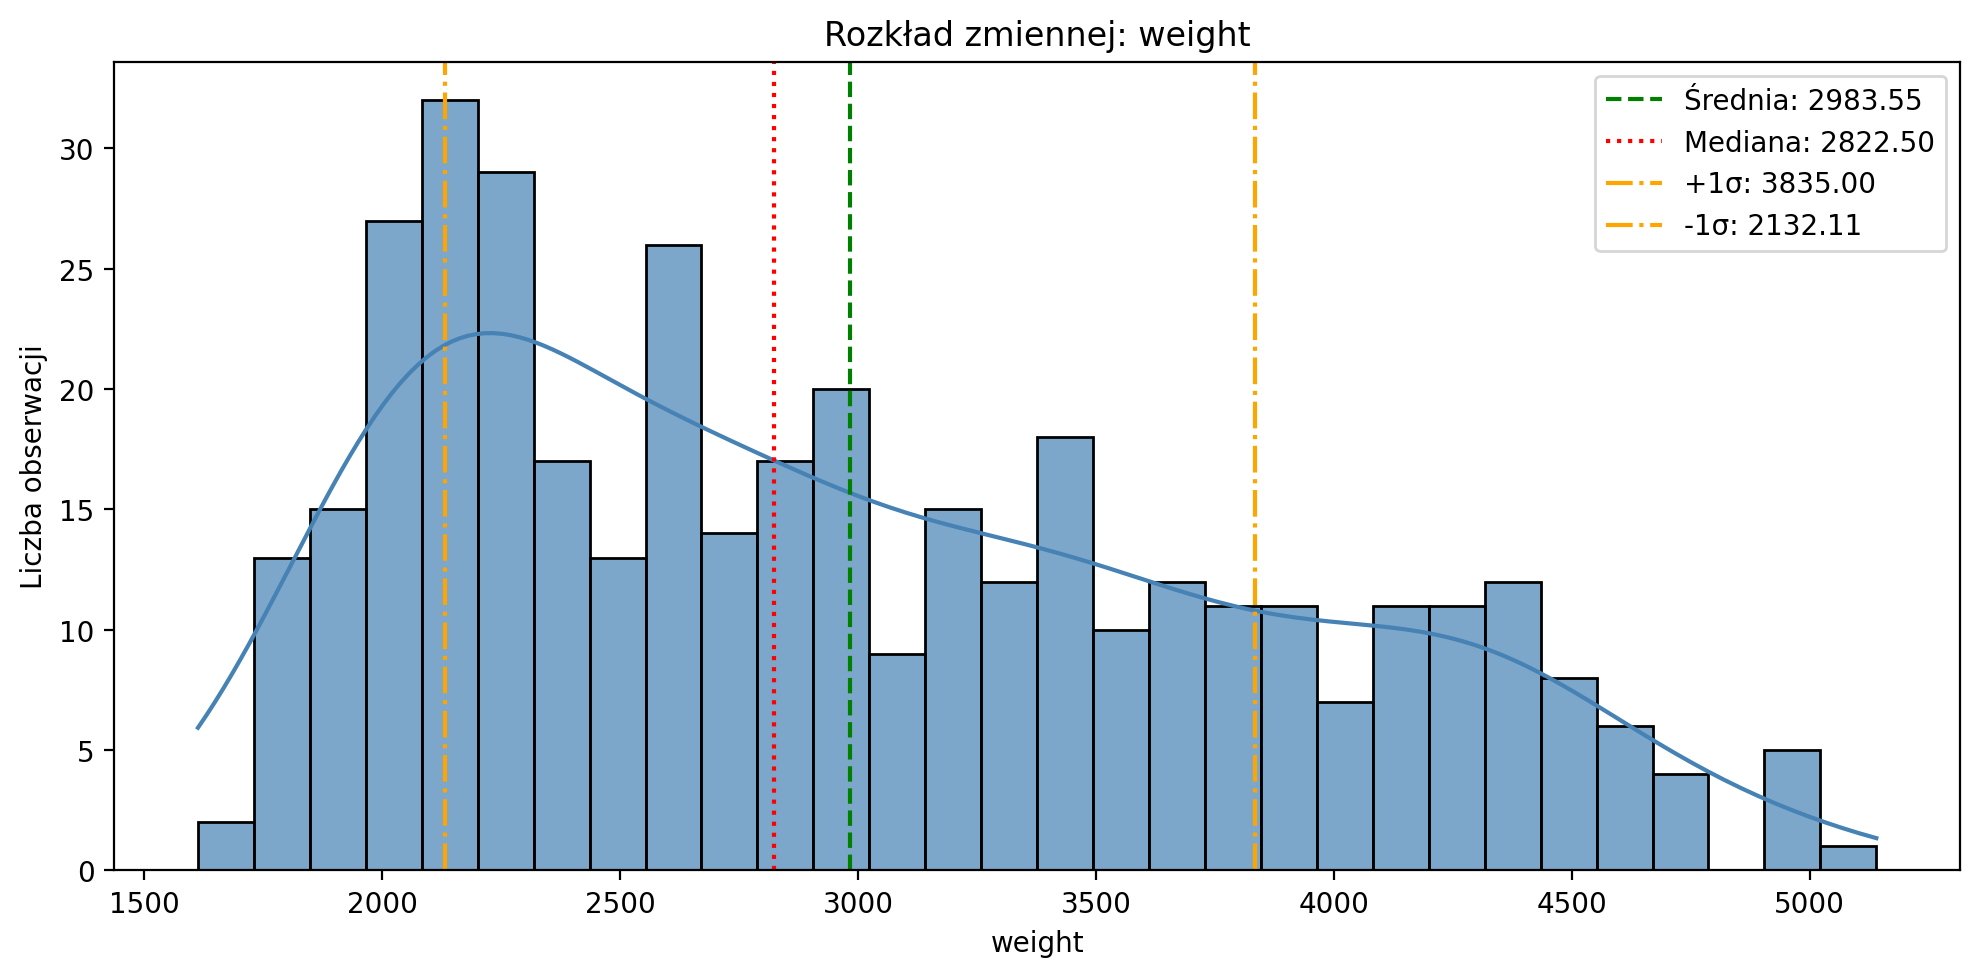

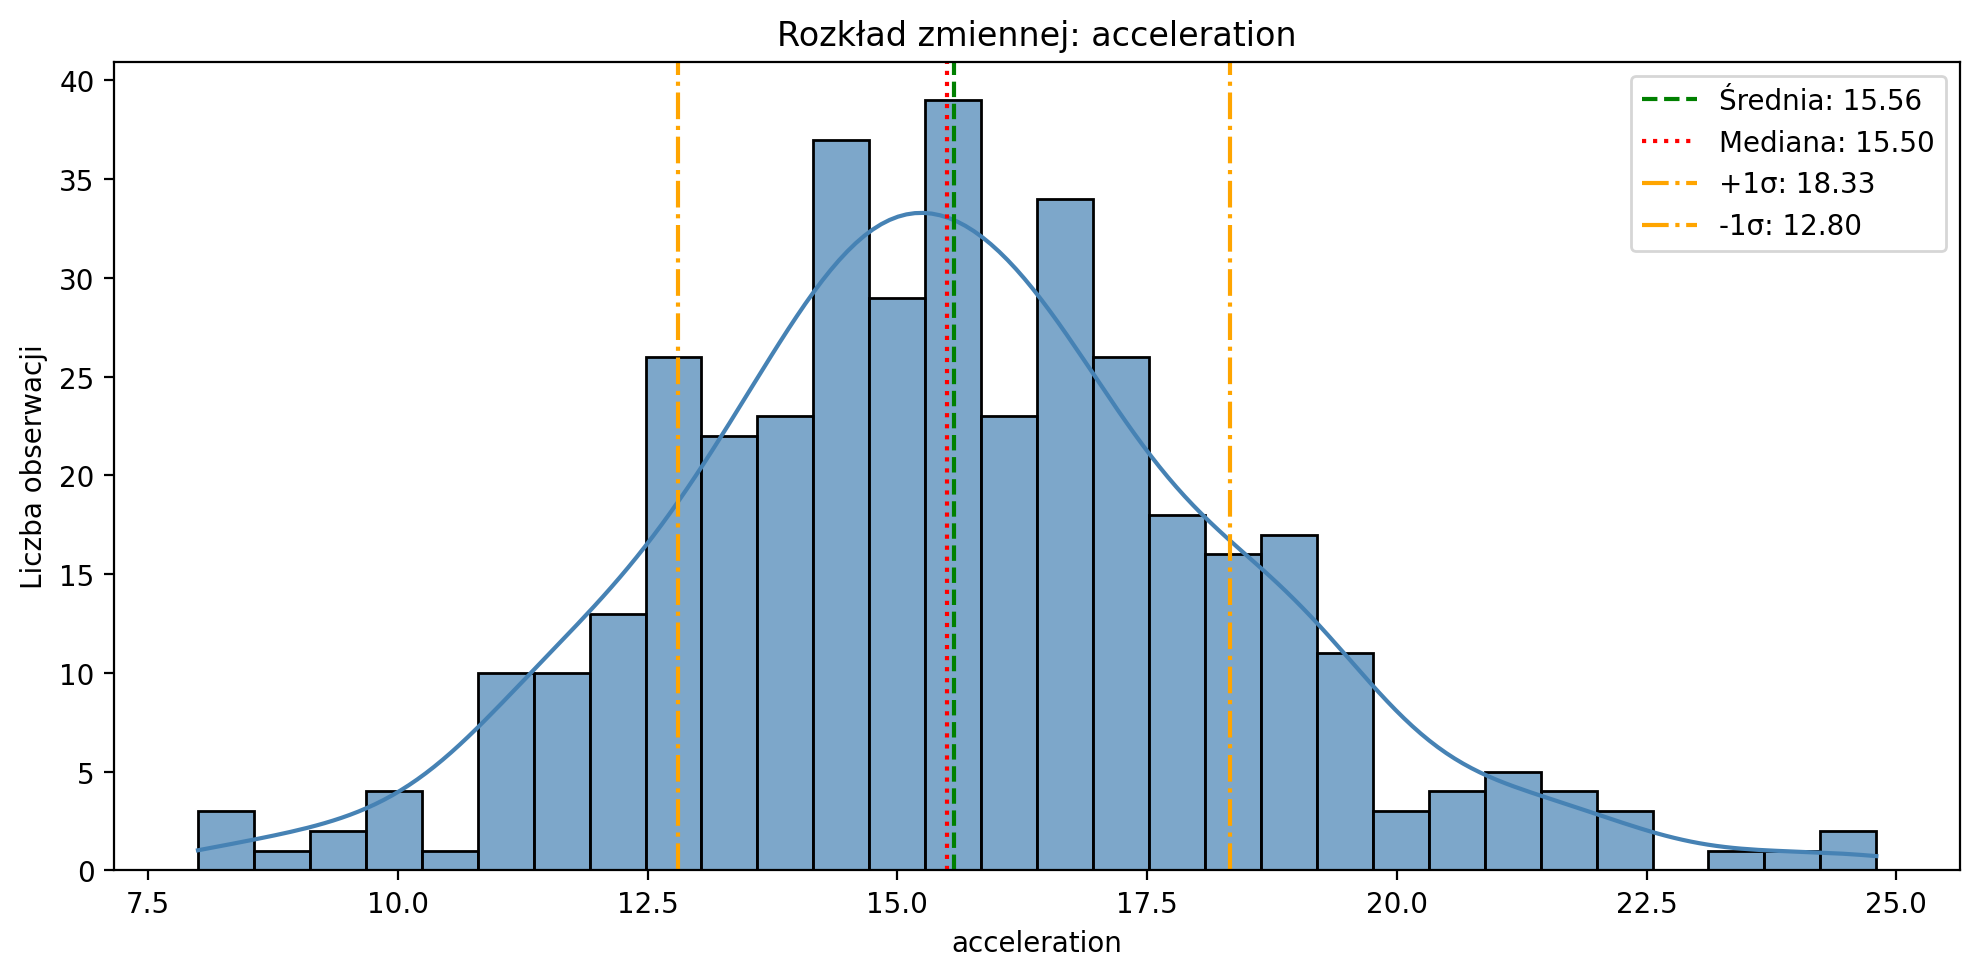

In [44]:
# lista kolumn numerycznych do analizy
numeric_cols = ['mpg', 'displacement', 'horsepower', 'weight', 'acceleration']

# funkcja rysująca histogram z oznaczeniem średniej, mediany i odchyleń
def plot_histogram_with_stats(data, column):
    values = data[column].dropna()
    mean_val = values.mean()
    median_val = values.median()
    std_val = values.std()

    plt.figure(figsize=(10, 5))
    sns.histplot(values, kde=True, color='steelblue', bins=30, alpha=0.7)

    # linie pomocnicze
    plt.axvline(mean_val, linestyle='dashed', color='green', label=f'Średnia: {mean_val:.2f}')
    plt.axvline(median_val, linestyle='dotted', color='red', label=f'Mediana: {median_val:.2f}')
    plt.axvline(mean_val + std_val, linestyle='dashdot', color='orange', label=f'+1σ: {(mean_val + std_val):.2f}')
    plt.axvline(mean_val - std_val, linestyle='dashdot', color='orange', label=f'-1σ: {(mean_val - std_val):.2f}')

    plt.title(f'Rozkład zmiennej: {column}')
    plt.xlabel(column)
    plt.ylabel('Liczba obserwacji')
    plt.legend()
    plt.tight_layout()
    plt.show()

# pętla: generowanie wykresów dla każdej cechy numerycznej
for col in numeric_cols:
    plot_histogram_with_stats(df_out_3, col)


### Boxploty – wizualizacja outlierów

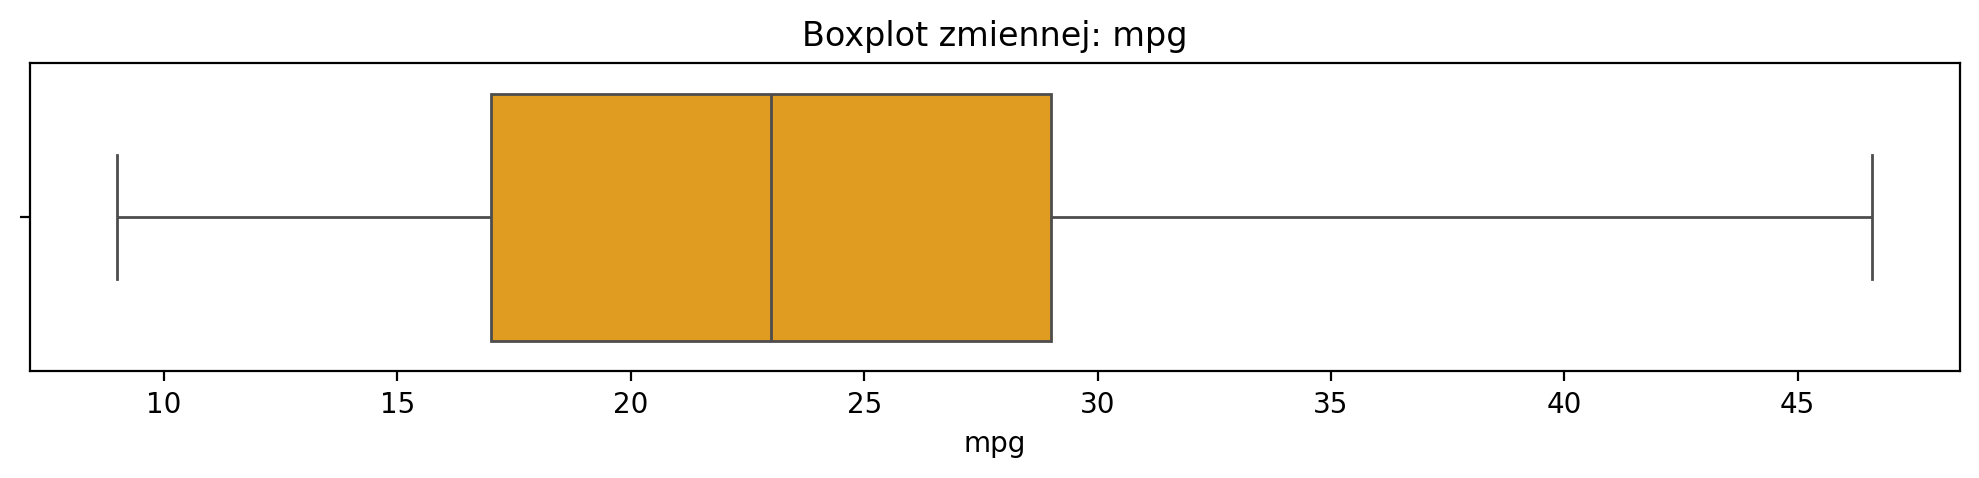

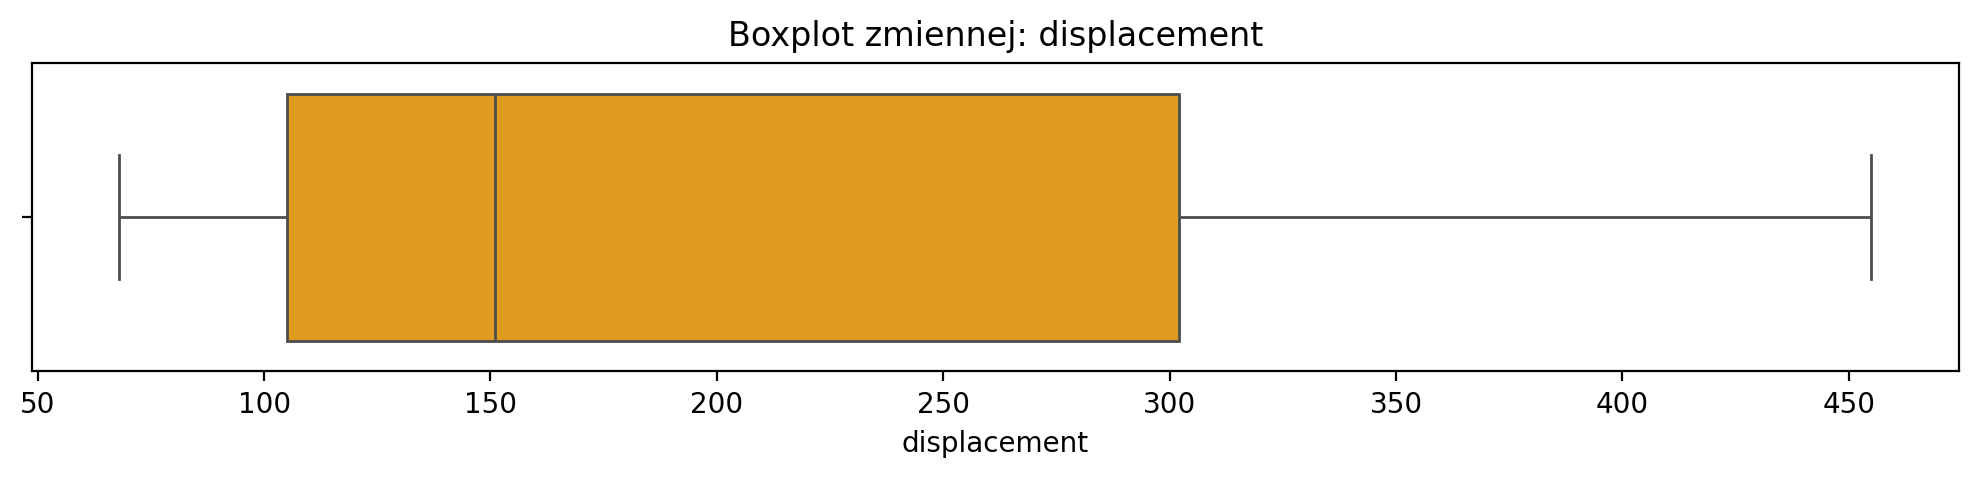

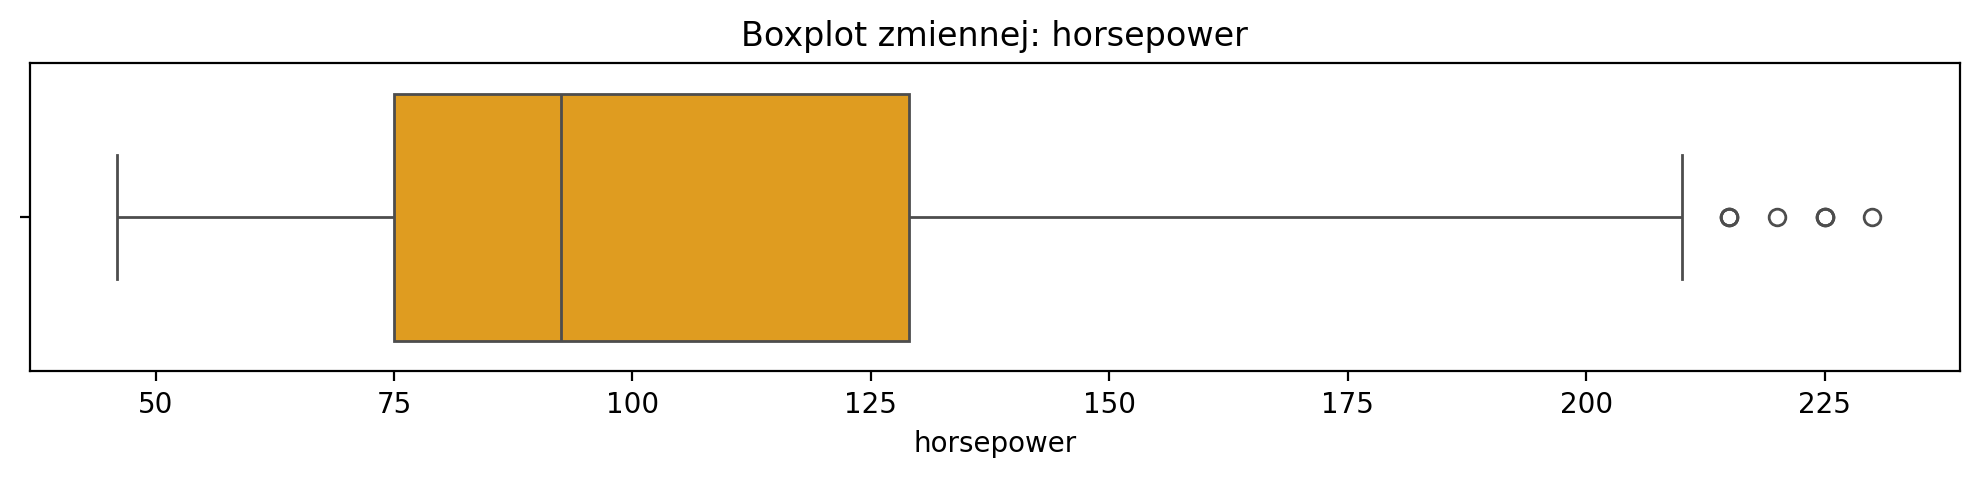

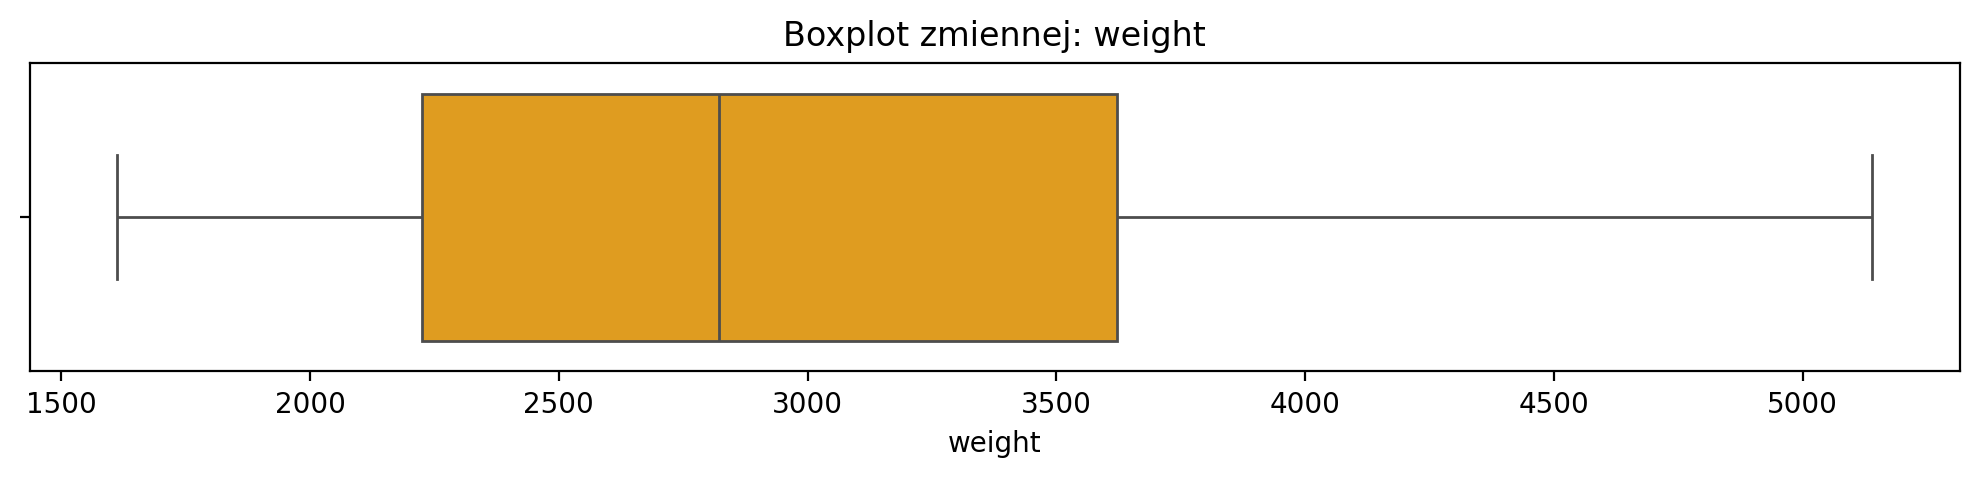

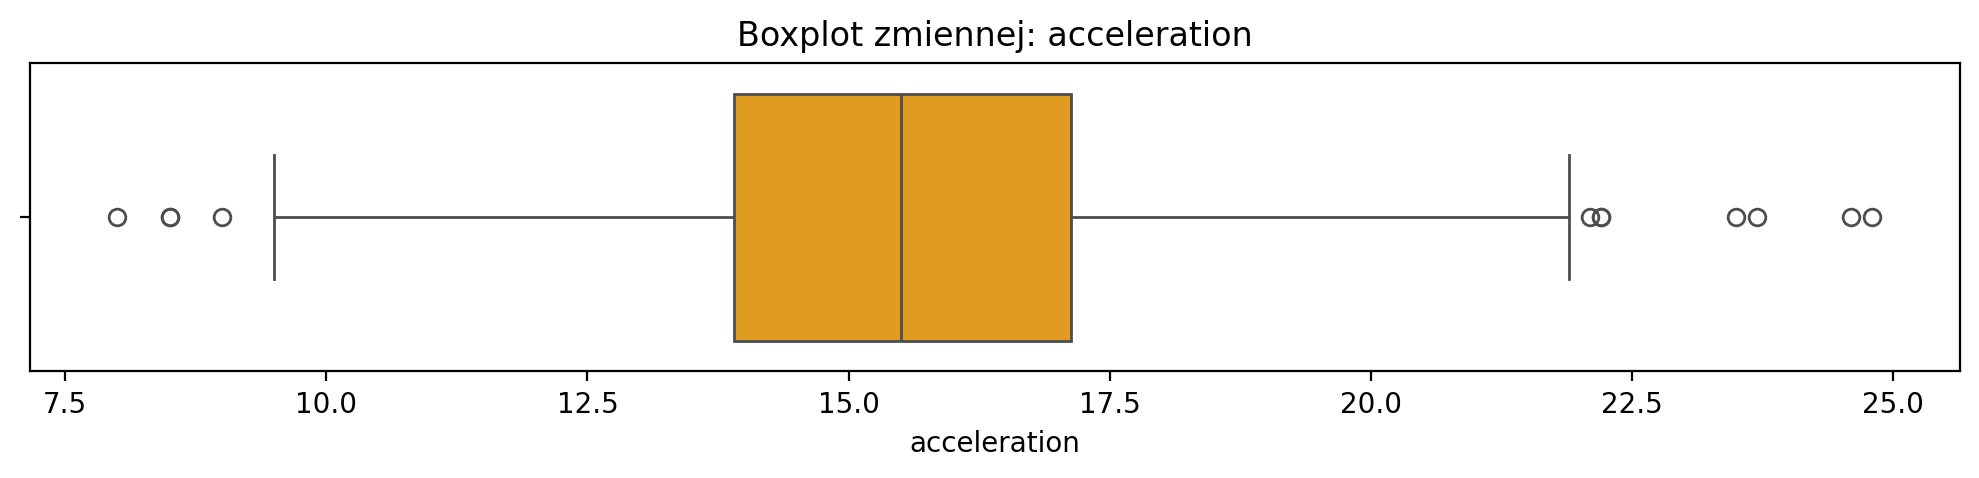

In [45]:
# Funkcja rysująca boxplot z tytułem i opisem
def plot_boxplot(data, column):
    plt.figure(figsize=(10, 2.5))
    sns.boxplot(x=data[column], color='orange')
    plt.title(f'Boxplot zmiennej: {column}')
    plt.xlabel(column)
    plt.tight_layout()
    plt.show()

# Pętla: generowanie boxplotów dla każdej cechy numerycznej
for col in numeric_cols:
    plot_boxplot(df_out_3, col)


## 3. Wykrywanie wartości odstających (outliers).

Wykorzystanie metody z Q1, Q3, IQR * 1.5

Kolumna 'names' nie bierze udziału w ML, ale pozostaje w danych

In [46]:
# wczytanie danych z pliku

df = pd.read_csv('cars_preprocessed.csv')
df.shape

(388, 9)

In [47]:
# wybieram kolumny numeryczne

numeric_cols = ['mpg', 'displacement', 'horsepower', 'weight', 'acceleration']
df_numeric = df_out_3[numeric_cols].copy() # tworzę DataFrame df_numeric, zawierający tylko cechy numeryczne

# przygotowuję DataFrame na dane logiczne (czy coś jest outlierem)

df_outliers = pd.DataFrame() # tworzę pusty DataFrame, do którego dodaję po jednej kolumnie z wartościami True/False dla każdego outliera.

# pętla – detekcja outlierów metodą IQR
# dla każdej kolumny obliczam IQR i zaznaczam obserwacje, które są poniżej dolnej granicy lub powyżej górnej granicy jako True

for col in df_numeric.columns:
    Q1 = df_numeric[col].quantile(0.25)
    Q3 = df_numeric[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = (df_numeric[col] < Q1 - 1.5 * IQR) | (df_numeric[col] > Q3 + 1.5 * IQR)
    df_outliers[col] = outliers

# kolumna pomocnicza – czy którykolwiek z atrybutów ma outlier
# dodaję kolumnę is_outlier, która wskazuje, czy dana obserwacja jest odstająca w jakiejkolwiek kolumnie.

df_outliers['is_outlier'] = df_outliers.any(axis=1)

# wyciągnięcie tylko outlierów

df_out_3.reset_index(drop=True, inplace=True) # reset indeksów (aktualizacja indeksów)
outliers_only = df_out_3[df_outliers['is_outlier']].copy()
print("Liczba obserwacji uznanych za outliery:", outliers_only.shape[0])
outliers_only

Liczba obserwacji uznanych za outliery: 17


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
6,14.0,8,454.0,220,4354,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215,4312,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225,4425,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190,3850,8.5,70,1,amc ambassador dpl
11,14.0,8,340.0,160,3609,8.0,70,1,plymouth 'cuda 340
13,14.0,8,455.0,225,3086,10.0,70,1,buick estate wagon (sw)
25,10.0,8,360.0,215,4615,14.0,70,1,ford f250
58,23.0,4,97.0,54,2254,23.5,72,2,volkswagen type 3
92,13.0,8,440.0,215,4735,11.0,73,1,chrysler new yorker brougham
93,12.0,8,455.0,225,4951,11.0,73,1,buick electra 225 custom


In [48]:
df_out_3.reset_index(drop=True, inplace=True)
df_outliers.reset_index(drop=True, inplace=True)

Usuwamy outliery z df_out_3. **Tworzymy nowy zbiór bez żadnych obserwacji oznaczonych jako outliery:**

In [49]:
# nowy zbiór danych

df_clean_final = df_out_3[~df_outliers['is_outlier']].copy()

**Zapis zbioru do pliku:** cars_clean_final.csv

In [50]:
df_clean_final.to_csv('cars_clean_final.csv', index=False)
# Domyślnie Pandas zapisuje numer wiersza (indeks) jako dodatkową kolumnę 
# - indeks nie zawiera żadnych istotnych informacji w kontekście analizy — to tylko numer porządkowy
# dlatego index=False = czysty plik CSV bez zbędnej kolumny

In [51]:
print("Rozmiar przed usunięciem outlierów:", df_out_3.shape)
print("Rozmiar po usunięciu outlierów:", df_clean_final.shape)

Rozmiar przed usunięciem outlierów: (388, 9)
Rozmiar po usunięciu outlierów: (371, 9)


## 4. Analiza rozkładów zmiennych na oczyszczonym zbiorze

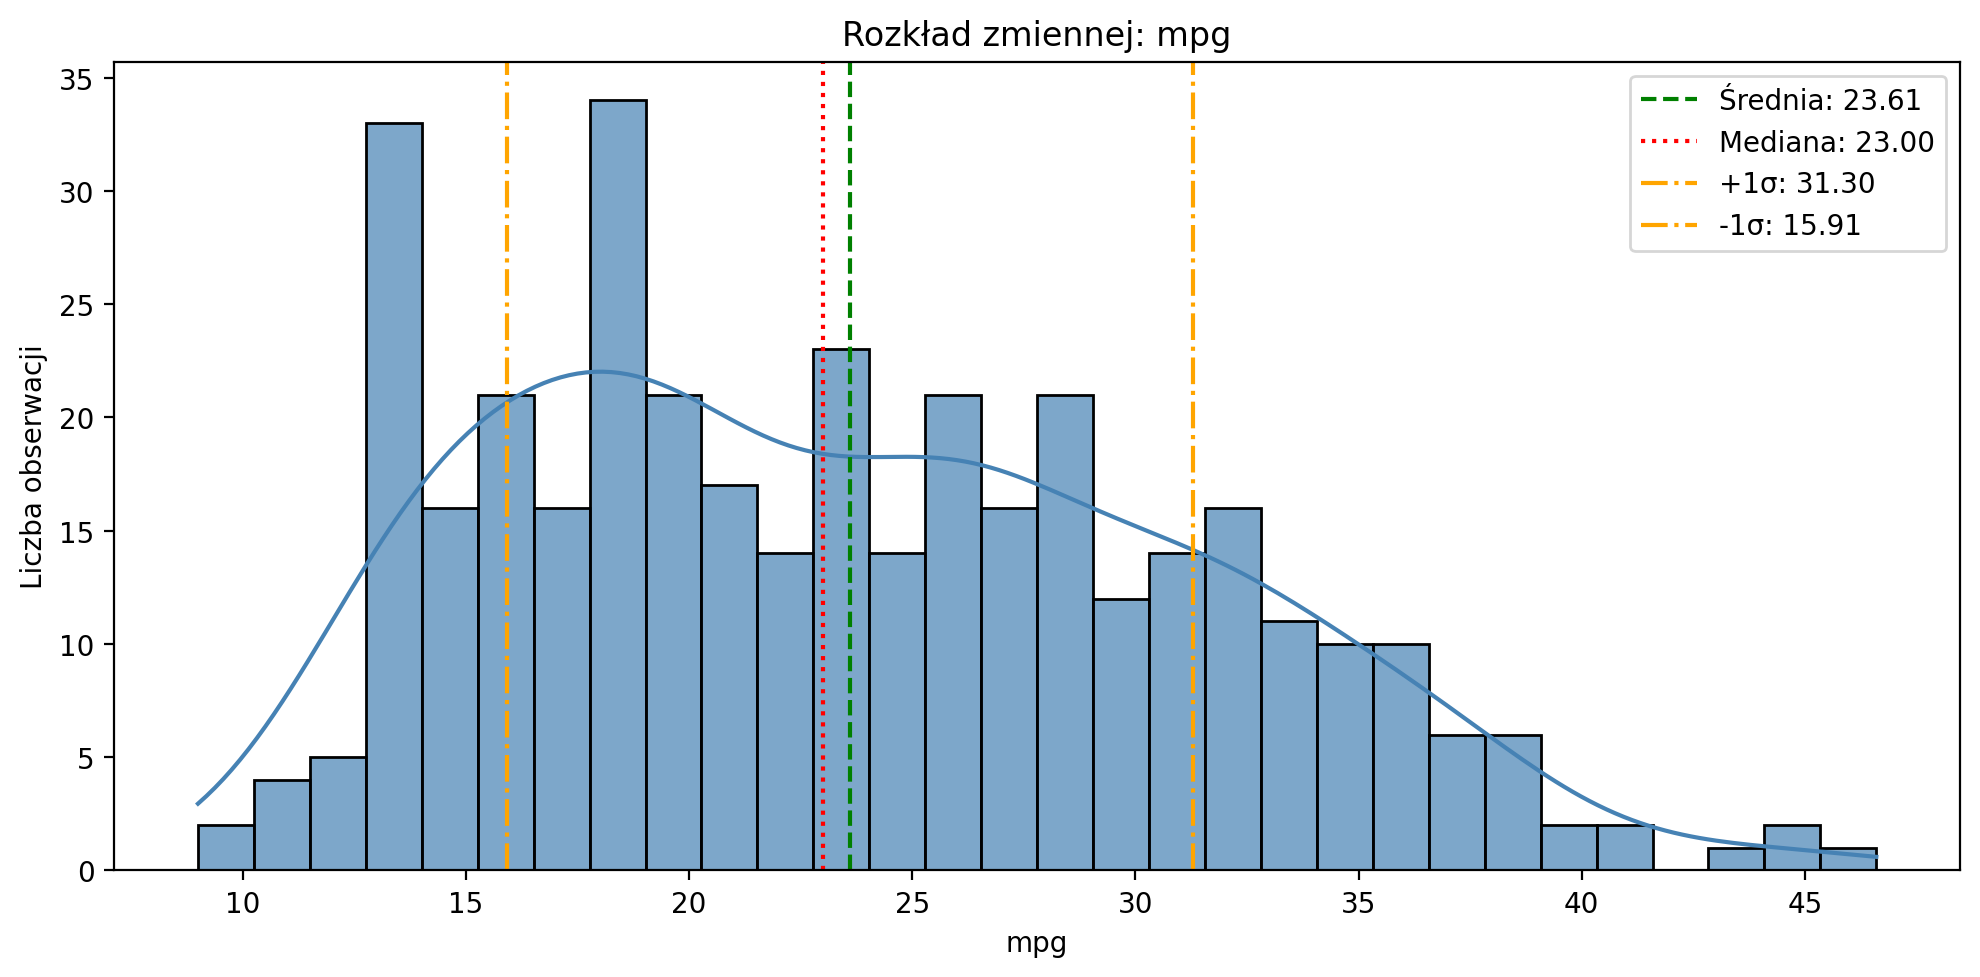

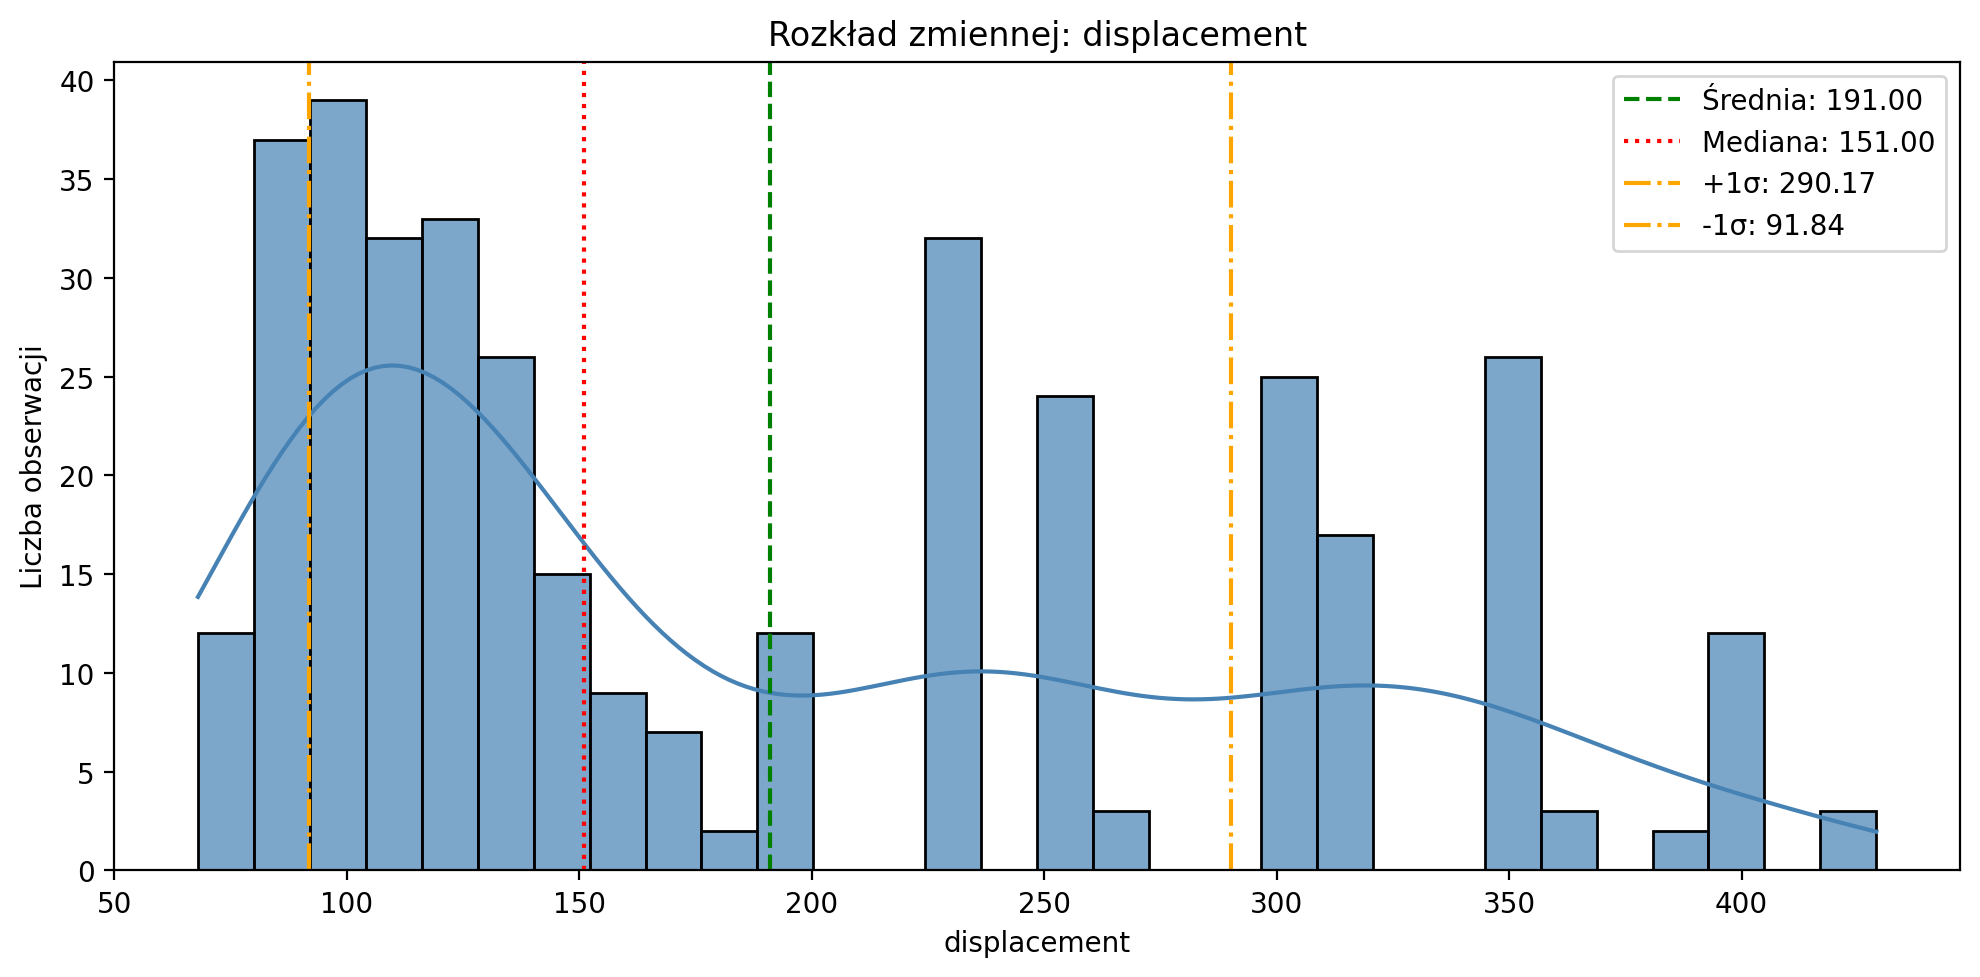

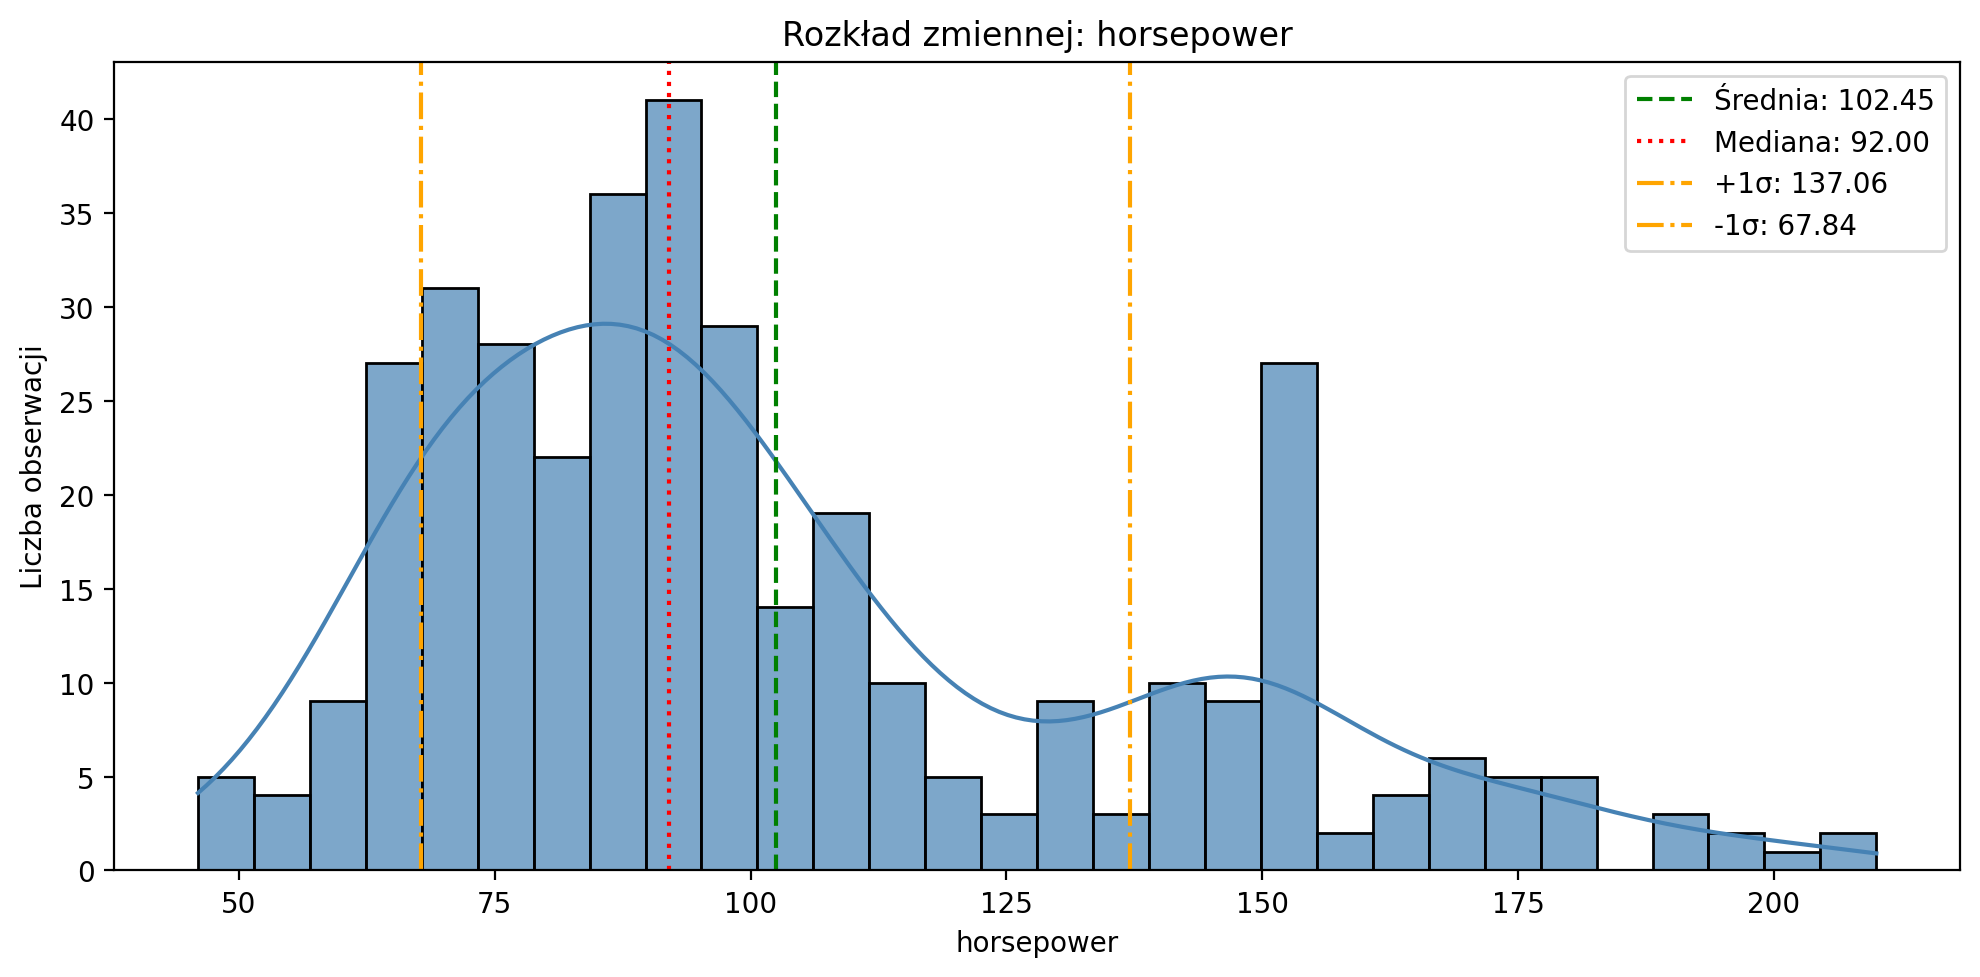

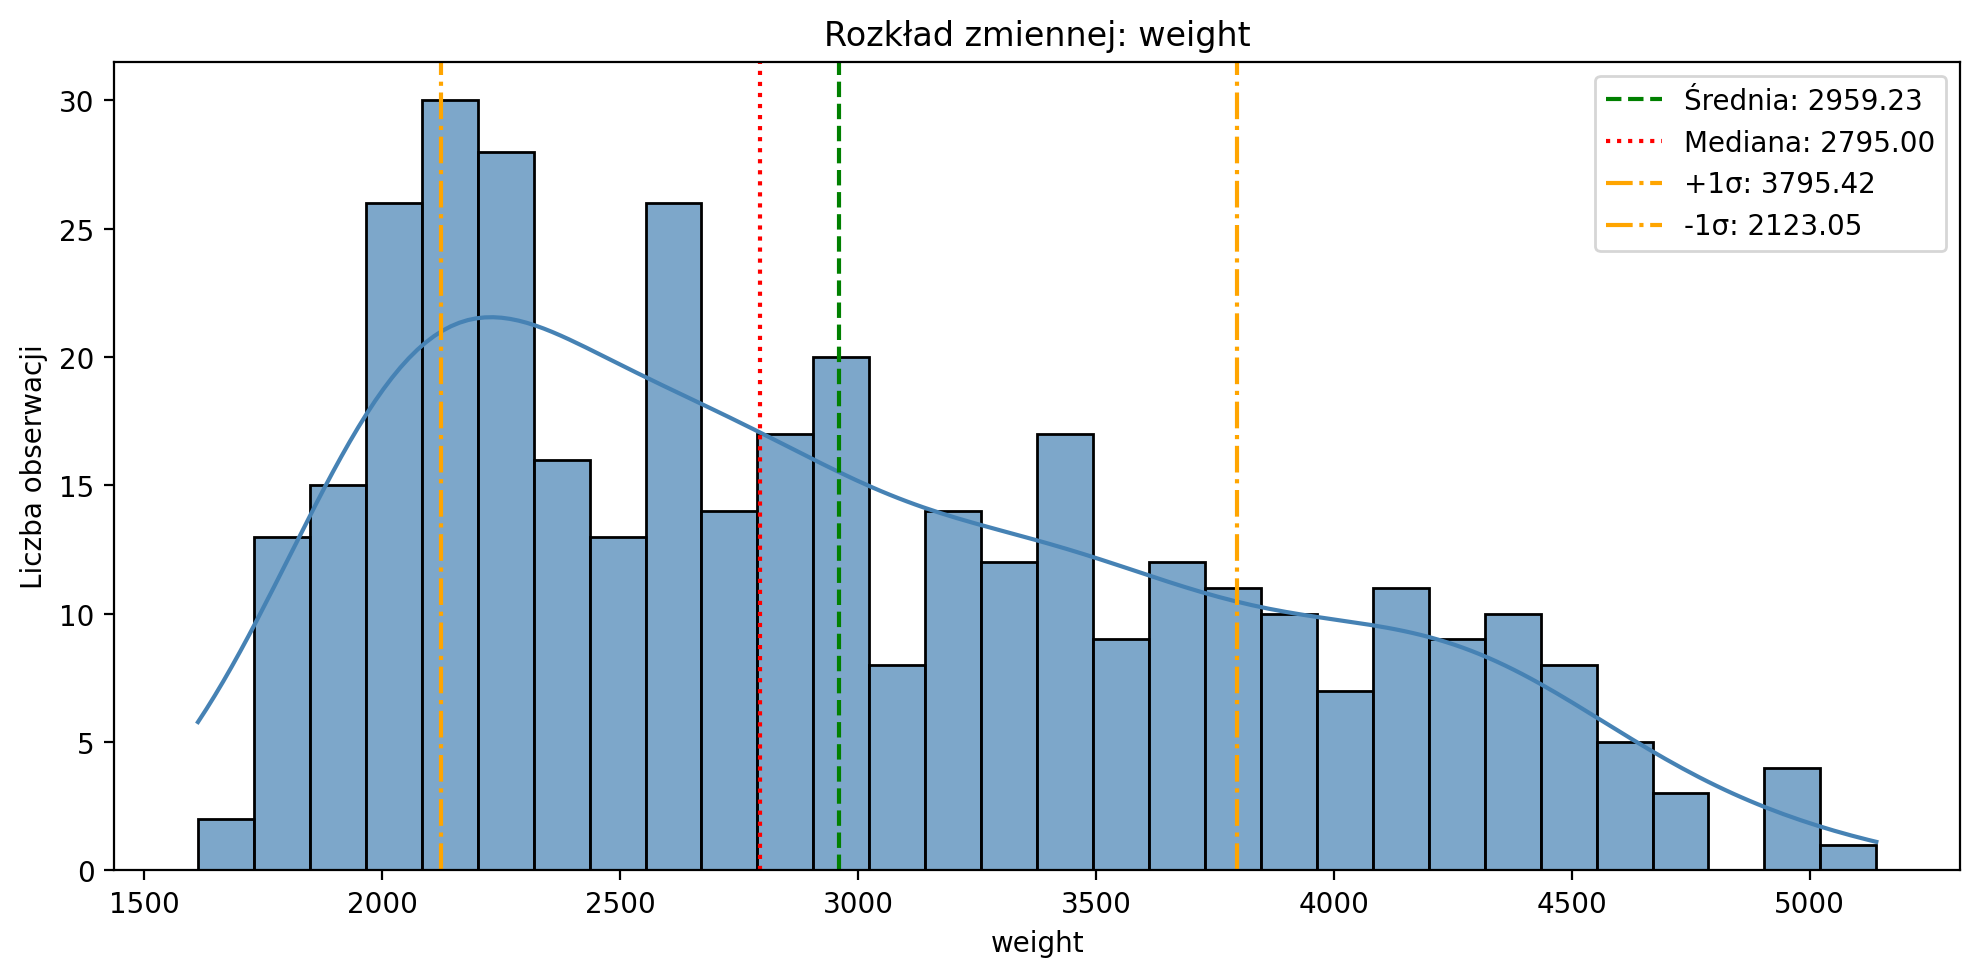

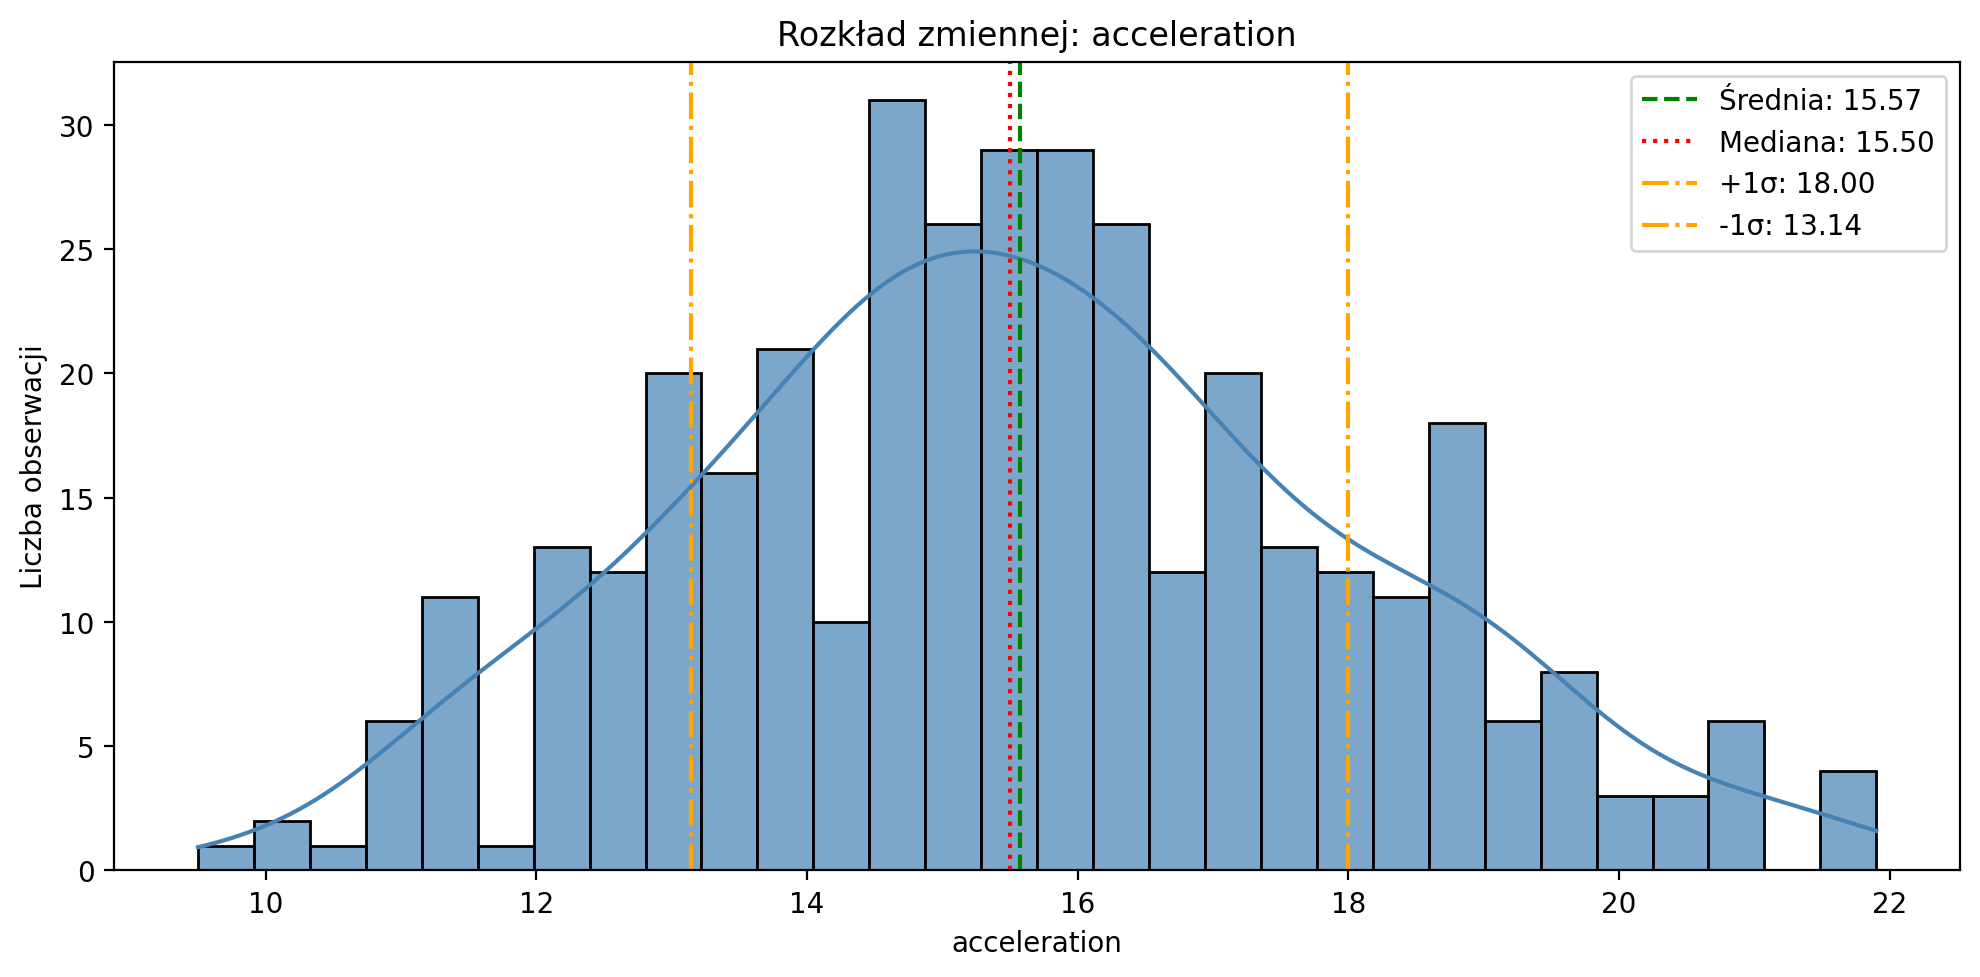

In [52]:
numeric_cols = ['mpg', 'displacement', 'horsepower', 'weight', 'acceleration']

def plot_distribution_with_stats(data, column):
    values = data[column].dropna()
    mean_val = values.mean()
    median_val = values.median()
    std_val = values.std()

    plt.figure(figsize=(10, 5))
    sns.histplot(values, kde=True, color='steelblue', bins=30, alpha=0.7)

    plt.axvline(mean_val, linestyle='dashed', color='green', label=f'Średnia: {mean_val:.2f}')
    plt.axvline(median_val, linestyle='dotted', color='red', label=f'Mediana: {median_val:.2f}')
    plt.axvline(mean_val + std_val, linestyle='dashdot', color='orange', label=f'+1σ: {(mean_val + std_val):.2f}')
    plt.axvline(mean_val - std_val, linestyle='dashdot', color='orange', label=f'-1σ: {(mean_val - std_val):.2f}')

    plt.title(f'Rozkład zmiennej: {column}')
    plt.xlabel(column)
    plt.ylabel('Liczba obserwacji')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Generuj wykresy dla każdej cechy numerycznej
for col in numeric_cols:
    plot_distribution_with_stats(df_clean_final, col)


### 4.1 Obliczanie skośności (skewness)

**Analiza skośności (Skewness)**

Skośność (ang. *skewness*) to miara asymetrii rozkładu danej zmiennej względem średniej:

- Wartość ≈ 0 oznacza **symetryczny rozkład** (zbliżony do normalnego)
- Wartość > 0 oznacza **prawoskośność** (ogon w prawo)
- Wartość < 0 oznacza **lewoskośność** (ogon w lewo)

**Praktyczna interpretacja:**
- -0.5 ≤ skew ≤ 0.5 **rozkład wystarczająco symetryczny**
- -1 < skew < -0.5 **Umiarkowana lewoskośność**
- 0.5 < skew < 1 **Umiarkowana prawoskośność**
- |skew| ≥ 1 **Silna skośność – rozważyć transformację**

Modele liniowe (np. regresja) lepiej działają, gdy zmienne mają **rozkłady zbliżone do normalnych** – dlatego identyfikacja i korekta skośności pomaga poprawić jakość predykcji.


In [53]:
df_temp = df_clean_final.drop(columns='name')
(df_temp <= 0).any().any()

np.False_

W żadnej kolumnie df_temp nie ma wartości mniejszych lub równych zeru. Możena bezpiecznie stosować np.log()

In [54]:
# wybór kolumn
numeric_cols = ['mpg', 'displacement', 'horsepower', 'weight', 'acceleration']

# obliczanie skośności dla każdej kolumny
skew_values = df_clean_final[numeric_cols].skew()
print("Wskaźniki skośności (skewness):")
print(skew_values)

Wskaźniki skośności (skewness):
mpg             0.404531
displacement    0.664078
horsepower      0.912526
weight          0.525612
acceleration    0.179466
dtype: float64


### Transformacja logarytmiczna displacement, horsepower, weight

- **mpg** i **acceleration** mają akceptowalną symetrię - nie wymagają transformacji
- **displacement, horsepower, weight** są prawoskośne:
    - **horsepower** wymaga transformacji
    - **weight** i **displacement** – można rozważyć transformację

In [55]:
import numpy as np

# tworzenie kopii oczyszczonego zbioru
df_transformed = df_clean_final.copy()

# transformacja logarytmiczna tylko dla cech pozytywnych
df_transformed['displacement_log'] = np.log(df_transformed['displacement'])
df_transformed['horsepower_log'] = np.log(df_transformed['horsepower'])
df_transformed['weight_log'] = np.log(df_transformed['weight'])

In [56]:
# wybór kolumn
numeric_cols = ['displacement_log', 'horsepower_log', 'weight_log']

# obliczanie skośności dla każdej kolumny
skew_values = df_transformed[numeric_cols].skew()
print("Wskaźniki skośności (skewness):")
print(skew_values)

Wskaźniki skośności (skewness):
displacement_log    0.210685
horsepower_log      0.303532
weight_log          0.146186
dtype: float64


**Transformacja logarytmiczna skutecznie zmniejszyła asymetrię rozkładów zmiennych.**

Wszystkie wartości znajdują się w przedziale [-0.5, 0.5], co oznacza, że są wystarczająco symetryczne i nadają się do użycia w modelach liniowych.

**DataFrame tylko ze zlogarytmowanymi cechami**

In [57]:
import numpy as np

# tworzymy kopię bez kolumny 'name'
#df_log = df_clean_final.drop(columns='name').copy()
df_log = df_clean_final.copy()

# tworzymy nowe kolumny logarytmiczne
df_log['displacement_log'] = np.log(df_log['displacement'])
df_log['horsepower_log'] = np.log(df_log['horsepower'])
df_log['weight_log'] = np.log(df_log['weight'])

# usuwamy oryginalne kolumny (chcemy tylko zlogarytmowane wersje)
df_log.drop(columns=['displacement', 'horsepower', 'weight'], inplace=True)

print(df_log.columns)
df_log.head()


Index(['mpg', 'cylinders', 'acceleration', 'year', 'origin', 'name',
       'displacement_log', 'horsepower_log', 'weight_log'],
      dtype='object')


,mpg,cylinders,acceleration,year,origin,name,displacement_log,horsepower_log,weight_log
0,18.0,8,12.0,70,1,chevrolet chevelle malibu,5.726848,4.867534,8.161660
1,15.0,8,11.5,70,1,buick skylark 320,5.857933,5.105945,8.214194
2,18.0,8,11.0,70,1,plymouth satellite,5.762051,5.010635,8.142063
3,16.0,8,12.0,70,1,amc rebel sst,5.717028,5.010635,8.141190
4,17.0,8,10.5,70,1,ford torino,5.710427,4.941642,8.145840


In [58]:
# eksport danych

df_log.to_csv('cars_log_only.csv', index=False)

### Wykresów histogramów po log-transformacji

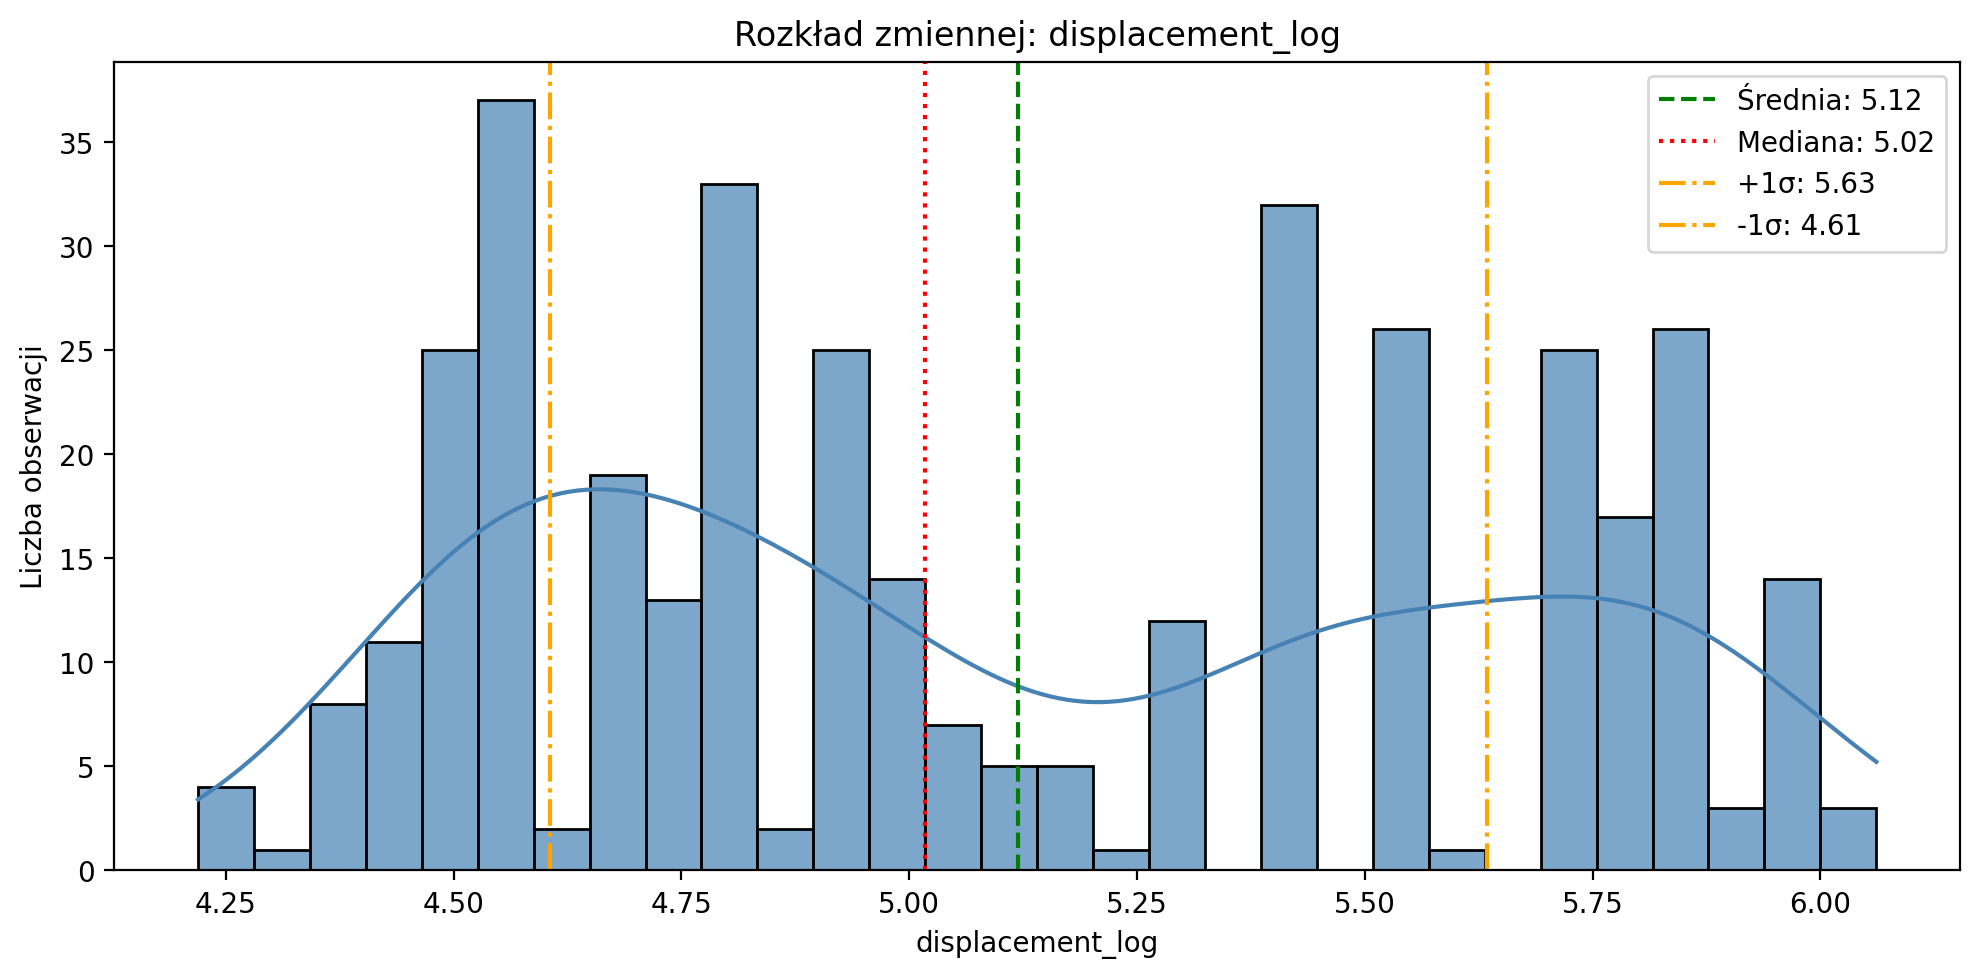

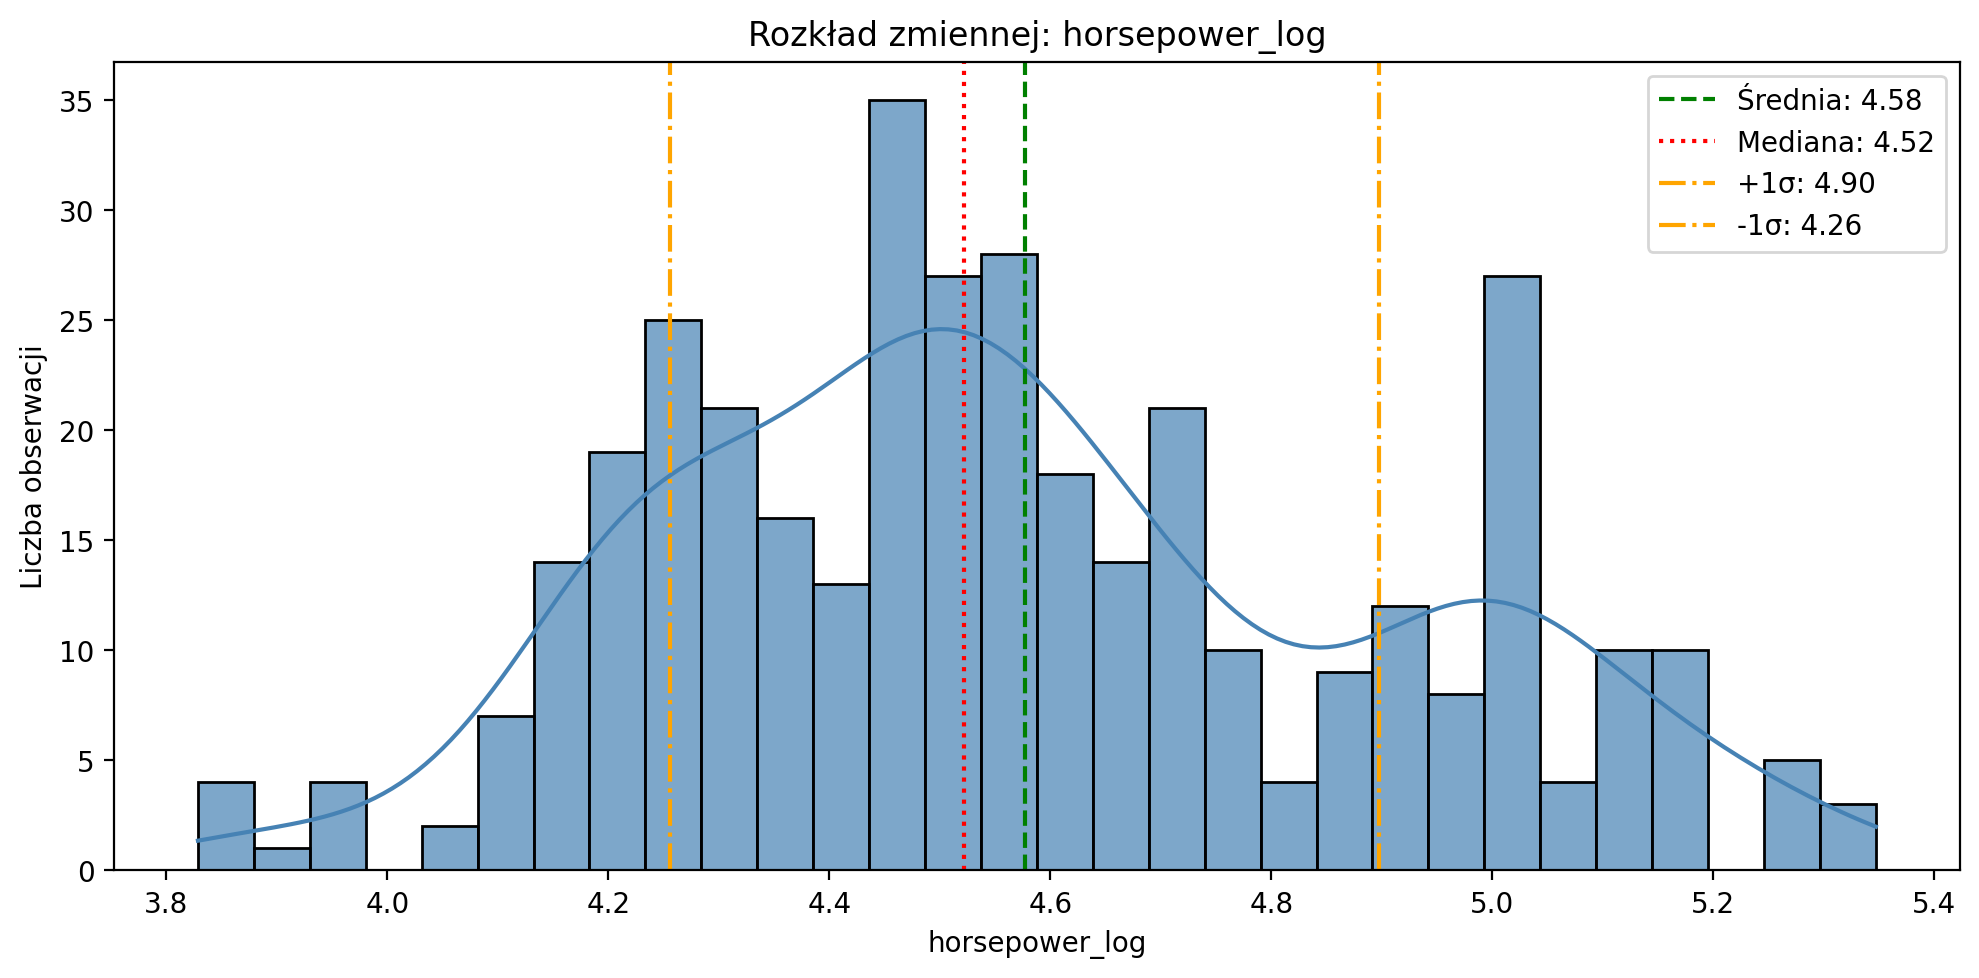

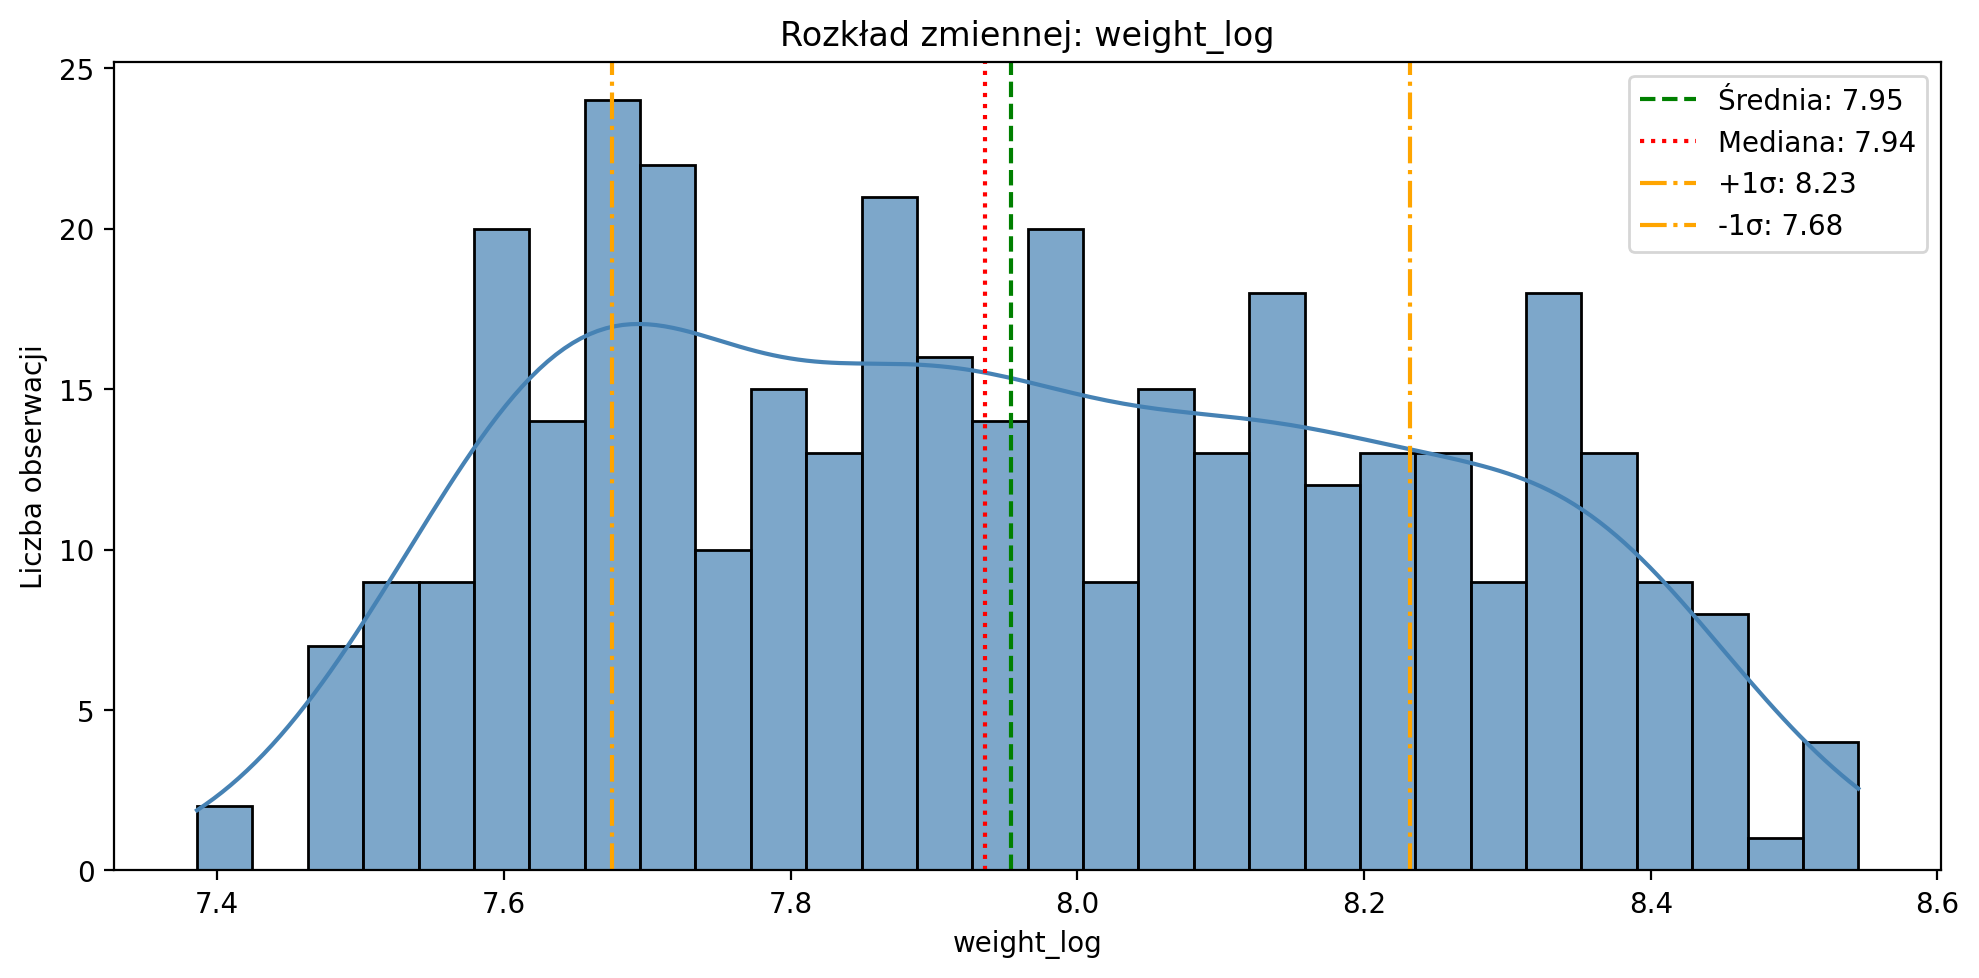

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

log_cols = ['displacement_log', 'horsepower_log', 'weight_log']

def plot_distribution(data, column):
    plt.figure(figsize=(10, 5))
    sns.histplot(data[column], kde=True, bins=30, color='steelblue', alpha=0.7)

    mean_val = data[column].mean()
    median_val = data[column].median()
    std_val = data[column].std()

    plt.axvline(mean_val, linestyle='dashed', color='green', label=f'Średnia: {mean_val:.2f}')
    plt.axvline(median_val, linestyle='dotted', color='red', label=f'Mediana: {median_val:.2f}')
    plt.axvline(mean_val + std_val, linestyle='dashdot', color='orange', label=f'+1σ: {(mean_val + std_val):.2f}')
    plt.axvline(mean_val - std_val, linestyle='dashdot', color='orange', label=f'-1σ: {(mean_val - std_val):.2f}')

    plt.title(f'Rozkład zmiennej: {column}')
    plt.xlabel(column)
    plt.ylabel('Liczba obserwacji')
    plt.legend()
    plt.tight_layout()
    plt.show()

# generujemy wykresy dla każdej zlogarytmowanej kolumny
for col in log_cols:
    plot_distribution(df_log, col)

Transformacja logarytmiczna skutecznie zmniejszyła asymetrię rozkładów zmiennych.

### 5. Analiza korelacji

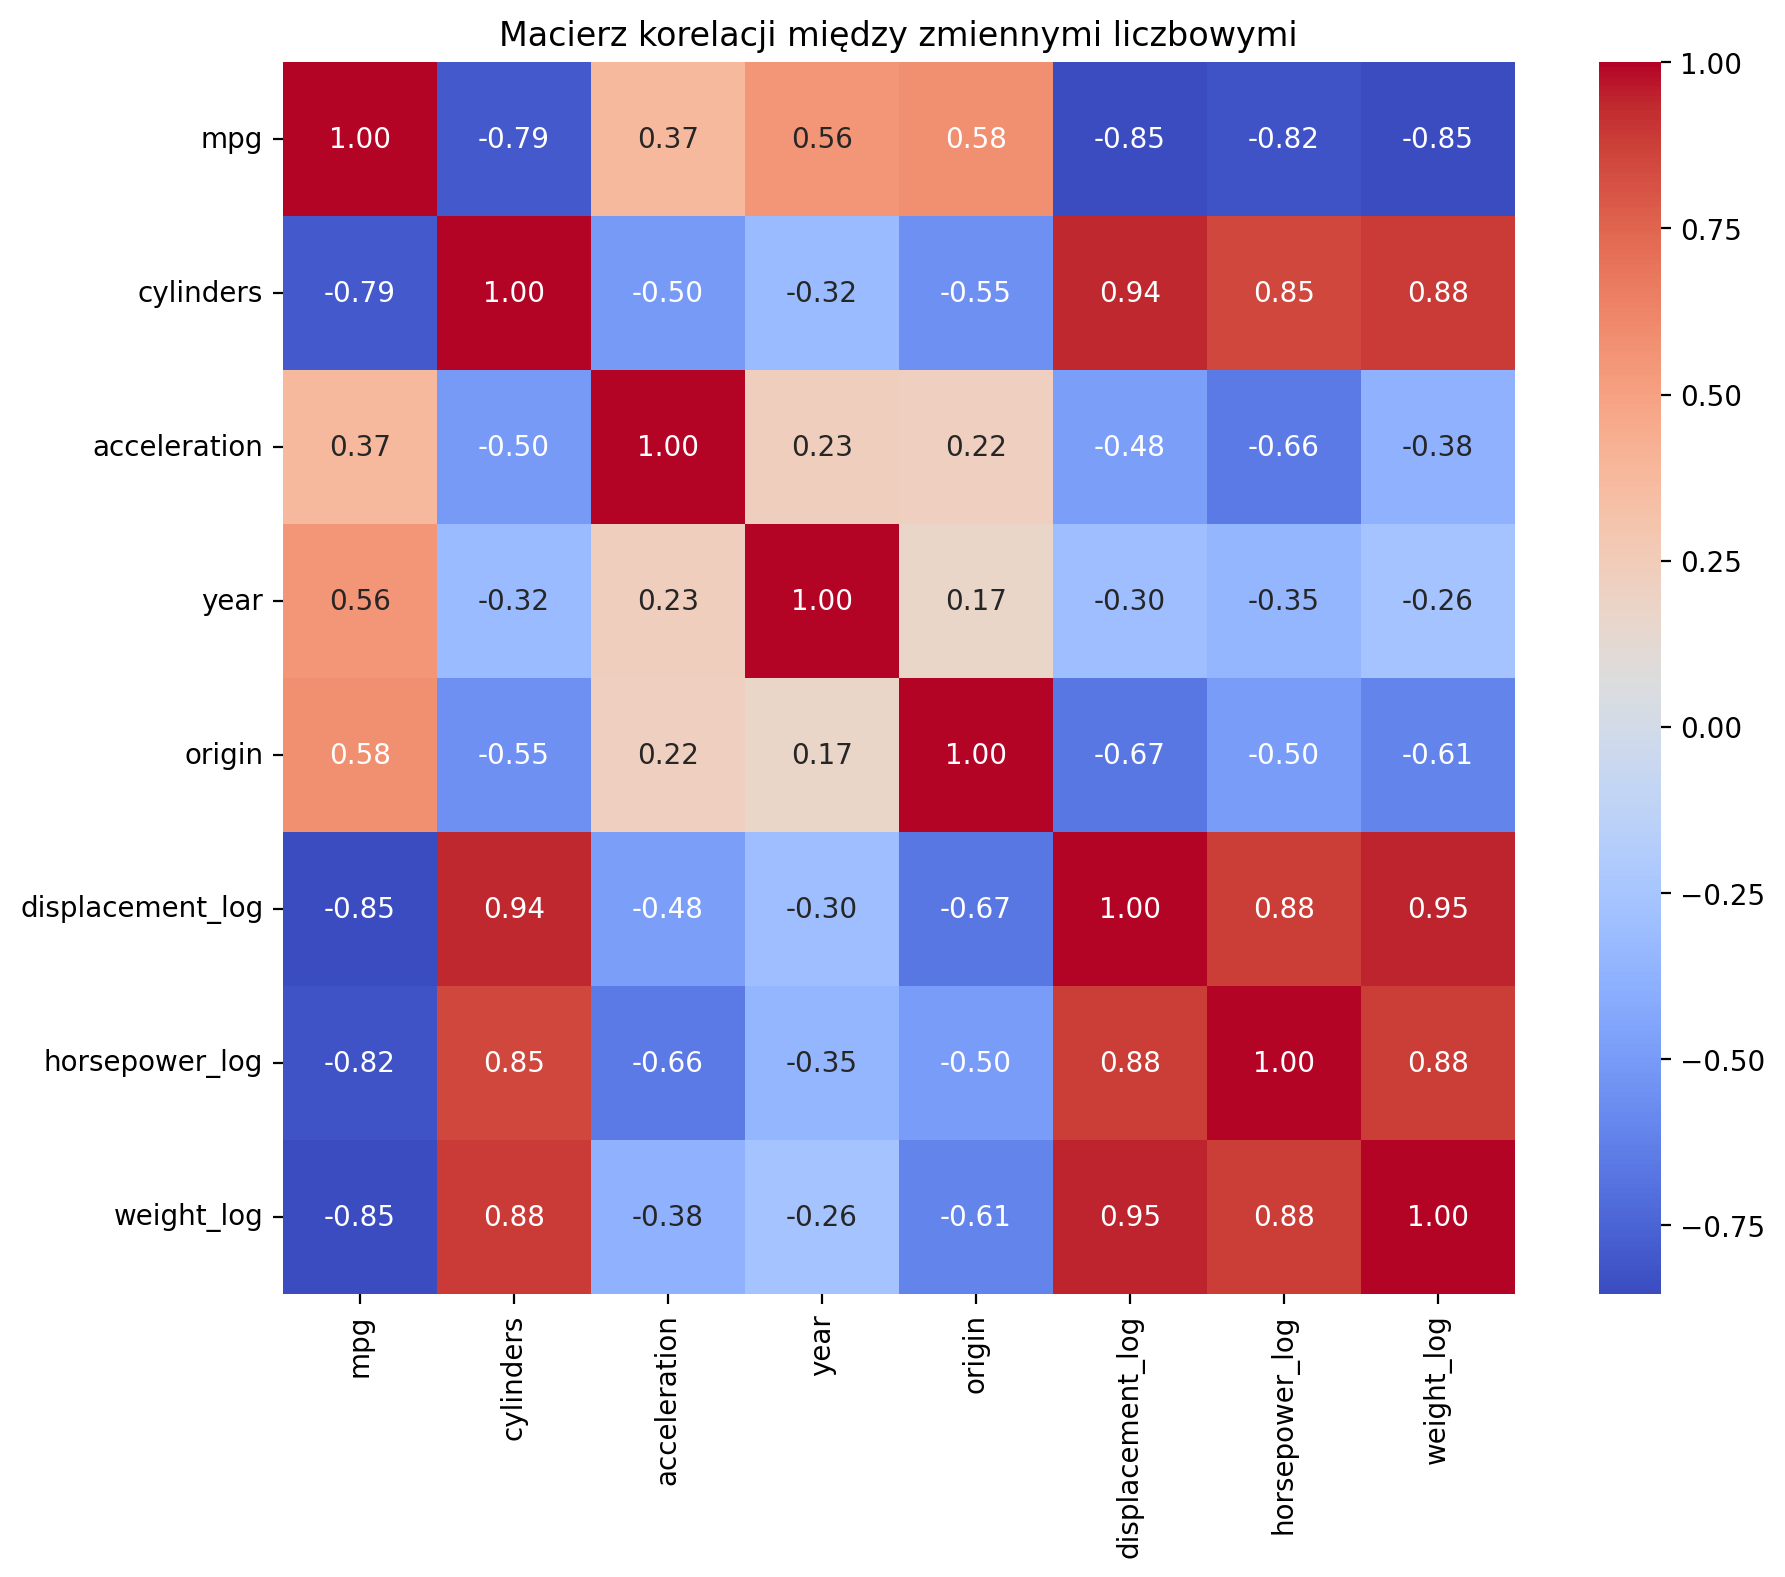

In [60]:
# macierz korelacji – tylko zmienne liczbowe

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(df_log.corr(numeric_only=True), annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Macierz korelacji między zmiennymi liczbowymi")
plt.tight_layout()
plt.show()

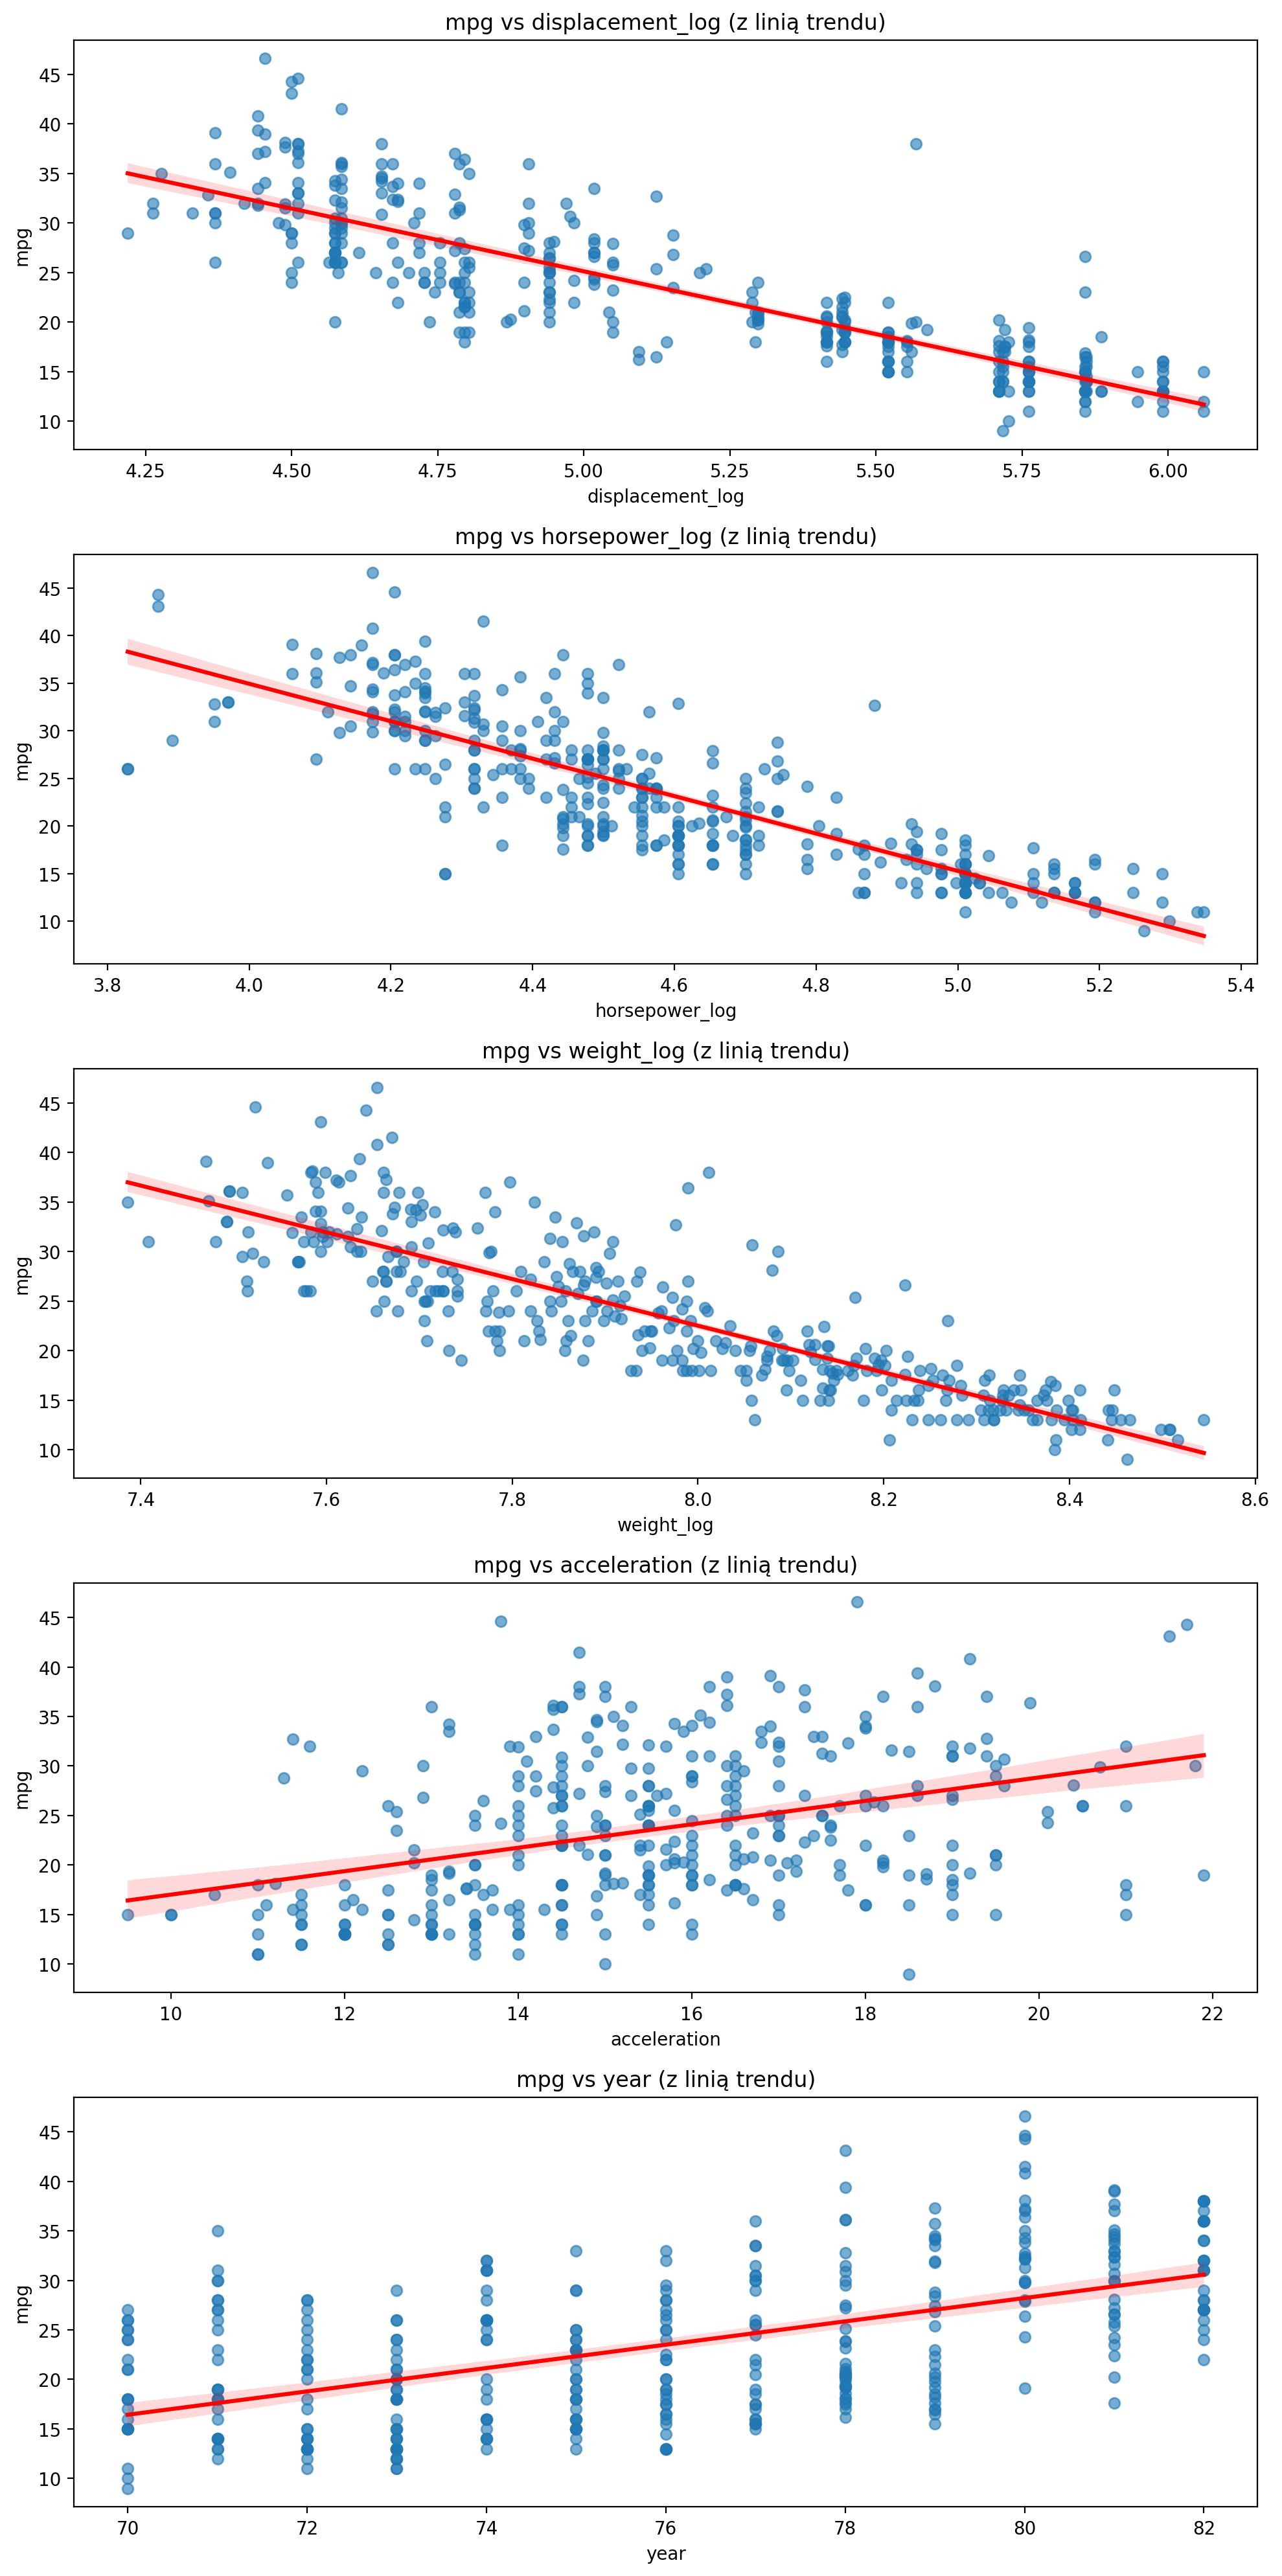

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

# lista cech numerycznych do porównania z mpg
columns_to_plot = ['displacement_log', 'horsepower_log', 'weight_log', 'acceleration', 'year']

plt.figure(figsize=(10, len(columns_to_plot) * 4))

for i, col in enumerate(columns_to_plot, start=1):
    plt.subplot(len(columns_to_plot), 1, i)
    sns.regplot(data=df_log, x=col, y='mpg', scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
    plt.title(f'mpg vs {col} (z linią trendu)')
    plt.xlabel(col)
    plt.ylabel('mpg')

plt.tight_layout()
plt.show()


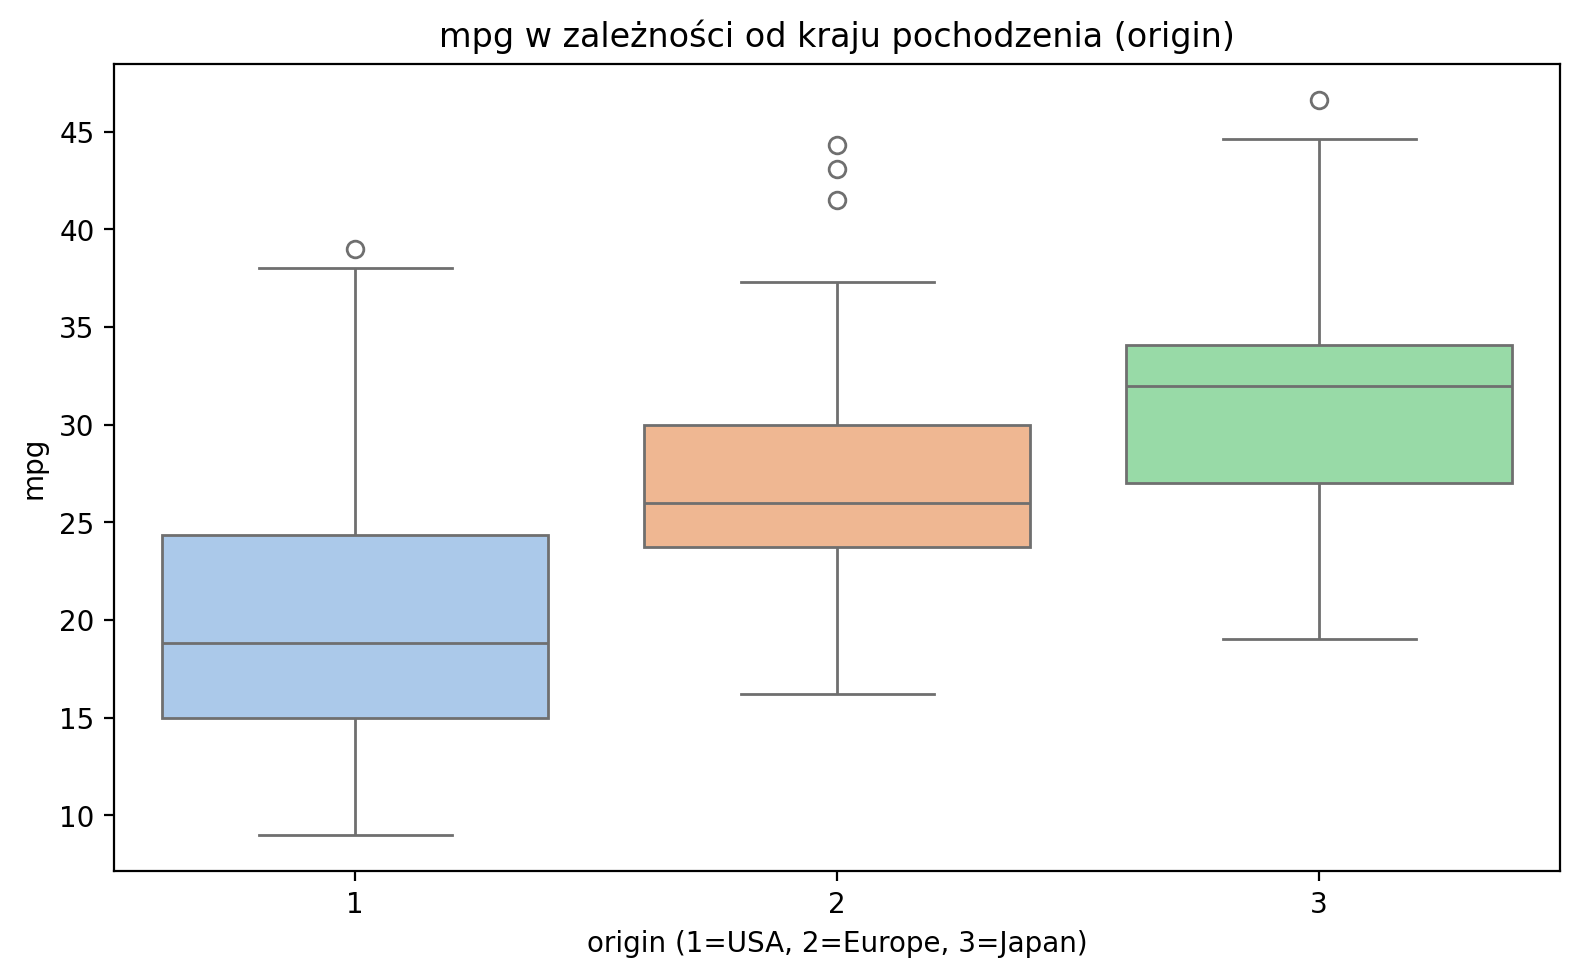

In [62]:
# boxplot mpg vs origin (zmienna kategoryczna)
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_log, x='origin', y='mpg', hue='origin', palette='pastel', legend=False)
plt.title('mpg w zależności od kraju pochodzenia (origin)')
plt.xlabel('origin (1=USA, 2=Europe, 3=Japan)')
plt.ylabel('mpg')
plt.tight_layout()
plt.show()


### Wnioski:

Zależności dla **mpg** (liczba mil przejechanych na jednym galonie paliwa – czyli wskaźnik zużycia paliwa / efektywności spalania) z innymi zmiennymi:
- displacement_log – **bardzo silna ujemna korelacja** z mpg (-0.85). Oznacza to, że samochody z większą objętością skokową silnika są mniej oszczędne
- horsepower_log – **silna ujemna korelacja** (-0.82). Im większa moc silnika, tym większe zużycie paliwa
- weight_log – **bardzo silna ujemna korelacja** (-0.85). Cięższe pojazdy zużywają więcej paliwa
- acceleration – **umiarkowana dodatnia korelacja** (0.37). Samochody o lepszym przyspieszeniu mogą być nieco bardziej oszczędne, choć zależność jest słabsza
- year – **średnia dodatnia korelacja** (0.56). Nowsze modele pojazdów są generalnie bardziej ekonomiczne
- origin – **średnia dodatnia korelacja** (0.58). Auta z Europy i Japonii mają na ogół lepsze mpg niż samochody amerykańskie.


- Największy wpływ na zużycie paliwa mają: masa pojazdu, pojemność i moc silnika – **im wyższe, tym gorsze spalanie**.
- **Lepszą efektywność spalania** wykazują: samochody produkowane w późniejszych latach, szybciej przyspieszajace auta oraz poza USA. Samochody Japońskie są bardziej oszczędne niż amerykańskie.


